<a href="https://colab.research.google.com/github/begumtekoz/sentiment-analysis-of-tweets/blob/main/tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Tweets about education in Covid 19

The digitalization of life with Covid-19 affected everyone to some extent. Especially the education area with the most interaction was interrupted with the arrival of the quarantine. That's why this area started to digitalize and transform.
Online education models have improved considerably in recent years, especially universities are more familiar with this subject.


Linda Weiser Friedman and Hershey H. Friedman referred to this in their article "Using Social Media Technologies to Enhance Online Learning".This article states that approximately 30% of university students take online courses. Online courses include many platforms such as blogs, social media technologies and web-based sites. So even though our transition to online education has increased with quarantine, most schools and universities had sufficient infrastructure for online education.
There were people unfamiliar with online education. People's opinions about online education were divided. Some people think that online education is very tiring and inefficient, but on the contrary, it increases the more useful and interactive performance.

In this study, we will examine people's thoughts about online education and Covid19 with tweets from certain regions. Population density in the areas we chose would create a significant biased. Fixing the random number of tweets will create an unbiased environment in the study. It contains the last hundred tweets posted in London and New York until 12.11.2020.


#  Data taken from USA

In [ ]:
import tweepy # for pulling tweets
import csv # for exporting and importing CSV files
import json # for formatting, exporting, and importing JSON files
import datetime # for date formatting
import html # for unescaping certain characters in the text

import os
import tweepy as tw
import pandas as pd


from tweepy import *

import pandas as pd
import csv
import re
import string

!pip install tweet-preprocessor

import preprocessor as p


In the beginning of the analyze the consumer key, consumer secret, access token and access token secret are taken from the Twitter Developer acount. It is applied for the both data from USA and UK

In [ ]:
CONSUMER_KEY = "" # fill this
CONSUMER_SECRET = "" # fill this
ACCESS_TOKEN = "" # fill this (required only for OAuth 1a)
ACCESS_TOKEN_SECRET = "" # fill this (required only for OAuth 1a)

In [ ]:
# OAuth 1a: Authentication with the user context

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

# OAuth 2: Authentication without the user context

# auth = tweepy.AppAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# api = tweepy.API(auth)

Its location was taken centered in Washington. And it covers 200 kilometers around.

In [ ]:
tweets_searched = tweepy.Cursor(api.search, q="#covid19 education -rt -filter:nativeretweets -public",
                                lang="en",
                                count=100,
                                tweet_mode="extended",
                                geocode="38.9117,-77.01017,200km").items(100)

tweets_json = []

for result_tweet in tweets_searched:
    print(result_tweet.full_text)
    tweets_json.append(result_tweet._json)

Discover how #Rwanda is using digitalization to address the education challenges brought on by #COVID19 #ResilientRecovery: https://t.co/55rgCStz8V https://t.co/iPbHobpGaM
Amid the #COVID19 pandemic and a White House transition, what's next for American schools? 

Join us Tuesday for an expert discussion of the future of US education, including pandemic recovery, school choice, and more. Register: https://t.co/c2mFMKB8FT
eLearning's Time To Shine? Apparently Not https://t.co/IphPqnejEz #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #Security #Mayor #Teachers #TechNews #Sports Please Retweet
Navajo Nation Readies For Vaccine To Fight 'Invisible Monster' https://t.co/bdiibgEV88 #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #Security #Mayor #Teachers #TechNews #Sports Please Retweet
8 Ways eLearning Can Help Us Prepare For A New World Of Work https://t.co/opcKTjiyZr #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #

We access the JSON object to examine its content more easily.

In [ ]:
# # Saving it in a JSON file
with open("tweetsUS.json", 'w', encoding="UTF-8") as outfile:
    # You can remove the indent parameter to make it more compact.
    json.dump(tweets_json, outfile, ensure_ascii=False, indent=4)

In [ ]:
with open("tweetsUS.json", 'r', encoding="UTF-8") as file:
    tweets_json = json.load(file)


After Json is created, we have selected the attributes we want below. These attributes will contain specific patterns that we will use when analyzing. We took the attributes in the tweet using objects. As an example, we used tweet ["favorite_count"] to get the favorite numbers in the tweet. And we created them below for all attributes.

In [ ]:
def get_tweet_timestamp(created_at):
    # A utility function that returns UNIX timestamp from the created_at attribute
    return int(datetime.datetime.strptime(created_at, "%a %b %d %H:%M:%S %z %Y").timestamp())

def get_unique_hashtags(hashtags_dict, serialize=False):
    # A utility function that returns UNIX timestamp from the created_at attribute
    hashtags = {hashtag["text"] for hashtag in hashtags_dict}
    if serialize:
        # Returns it as a simple string, hashtags are separated by ","
        return ','.join(hashtags)
    else:
        return hashtags

for tweet in tweets_json:
    print("User handle:",tweet["user"]["screen_name"])
    print("User name:",tweet["user"]["name"])
    # In this case, name and screen_name correspond to the same value, but most of the
    # time, it is not the case.

    print("Date and time:",tweet["created_at"])
    # Obtaining a UNIX timestamp from the date and time (might come handy for further
    # analyses):
    print("UNIX timestamp from date:",get_tweet_timestamp(tweet["created_at"]))

    print("Tweet:",tweet["full_text"])
    print("Hashtags:",tweet["entities"]["hashtags"])
    # If you do not need the indices, this directly gives you the unique hashtags:
    print("Unique hashtags:",get_unique_hashtags(tweet["entities"]["hashtags"]))
    print("Favorite count:",tweet["favorite_count"])
    print("Retweet count:",tweet["retweet_count"])
    print("Source:",tweet["source"])


We first took the simplified version of the text.
This json made it easy to convert the attributes we chose to csv.

In [ ]:
# The function we had also used while collecting some tweets:
def simplify_text(text):
    # Practically replaces line breaks or other whitespace characters with a single
    # space and then unescapes characters.
    return html.unescape(" ".join(text.split()))

In [ ]:
with open("tweetsUS.csv", 'w', encoding="UTF-8") as outfile:
    writer = csv.writer(outfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    # Writing the headers
    writer.writerow(["screen_name",

                     "follower_count",
                     "timestamp",
                     "text",
                     "hashtags",
                     "favorite_count",
                     "retweet_count",
                    "source"])

    # Writing each tweet on a line
    for tweet in tweets_json:
        writer.writerow([tweet["user"]["screen_name"],
                         tweet["user"]["followers_count"],
                         get_tweet_timestamp(tweet["created_at"]),
                         simplify_text(tweet["full_text"]),
                         get_unique_hashtags(tweet["entities"]["hashtags"], serialize=True),
                         tweet["favorite_count"],
                         tweet["retweet_count"],
                         tweet["source"]])

The created CSV is run in the below

In [ ]:
import pandas as pd
import html

# Importing it using Pandas:
dataset = pd.read_csv("tweetsUS.csv")
dataset.sample(2)


,screen_name,follower_count,timestamp,text,hashtags,favorite_count,retweet_count,source
3,AJBlackston,1701,1607891513,Navajo Nation Readies For Vaccine To Fight 'Invisible Monster' https://t.co/bdiibgEV88 #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #Security #Mayor #Teachers #TechNews #Sports Please Retweet,"State,Crime,Education,TechNews,Teachers,Security,Sports,Federal,Local,COVID19,Mayor,Politics,Fire,News",0,0,"<a href=""http://www.powerapps.com"" rel=""nofollow"">Microsoft Power Platform</a>"
9,AJBlackston,1701,1607875166,Perfect Presentations Through Technology: Part 2 https://t.co/Esdrus6V1u #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #Security #Mayor #Teachers #TechNews #Sports Please Retweet,"State,Crime,Education,TechNews,Teachers,Security,Sports,Federal,Local,COVID19,Mayor,Politics,Fire,News",0,0,"<a href=""http://www.powerapps.com"" rel=""nofollow"">Microsoft Power Platform</a>"



Twitter data taken from America is above. We checked how many attributes and observations this data consists of. The dimension of data is 100 and 8. That means, there is 100 tweets and 8 attributes.

In [ ]:
dataset.shape

(100, 8)


Although the data was taken in English, the language of the data was checked again. According to the result, all of tweets' language is English.

In [ ]:
from langdetect import detect

def detect_tweet_lang(tweet):
    # This roughly removes user handles and URLs:
#     tweet = ' '.join(re.sub("(@[A-Za-z0-9_\-]+ )|(https?:\/\/.* )|(www\..* )"," ",tweet).split())
    try:
        lang = detect(tweet)
    except:
        lang = ""

    return lang
#this code enables us to understande the language of tweets
dataset["lang"] = dataset["text"].map(detect_tweet_lang)

# Summarizes detected language counts:
dataset["lang"].value_counts()
#It is filtered that the language of tweets and the result shows there is only english tweets

en    100
Name: lang, dtype: int64


The most important part of the data to be analyzed is the text part. Although we tried to simplify the data in previous codes, the data contains too many elements. Therefore, the things that break the text integrity in the text are transferred to other columns. This transferred data also contains important information. This will be studied in the following sections of this analysis. Hashtags and links in the text have been transferred to new columns. And most importantly, the cleaned data is in a new column called clean_text.

In [ ]:

def get_at(row):
    return re.findall("@[\w]+", row["text"])

def get_http(row):
    return re.findall("http[\:\/\.\w]+", row["text"])

def get_hashtags(row):
    return re.findall("#[\w]+", row["text"])


def clean_text(row):
    clean = row["text"]

    if len(row["tags"]) != 0:
        for word in row["tags"]:
            clean = clean.replace(word, "")

    if len(row["links"]) != 0:
        for word in row["links"]:
            clean = clean.replace(word, "")

    #only remove the # symbol
    clean = clean.replace("#", "").replace("/", "").replace("(", "").replace(")", "")

    return clean.strip()

dataset["tags"] = dataset.apply(lambda row: get_at(row), axis = 1)
dataset["links"] = dataset.apply(lambda row: get_http(row), axis = 1)
dataset["clean_text"] = dataset.apply(lambda row: clean_text(row), axis = 1)

dataset.sample(2)

,screen_name,follower_count,timestamp,text,hashtags,favorite_count,retweet_count,source,lang,tags,links,clean_text
41,AJBlackston,1701,1607760712,"Biden-Harris Team Named Time's ""Person Of The Year"" https://t.co/URwROmN8tU #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #Security #Mayor #Teachers #TechNews #Sports Please Retweet","State,Crime,Education,TechNews,Teachers,Security,Sports,Federal,Local,COVID19,Mayor,Politics,Fire,News",0,0,"<a href=""http://www.powerapps.com"" rel=""nofollow"">Microsoft Power Platform</a>",en,[],[https://t.co/URwROmN8tU],"Biden-Harris Team Named Time's ""Person Of The Year"" Education Federal State Local News Crime Fire Politics COVID19 Security Mayor Teachers TechNews Sports Please Retweet"
63,rweingarten,109000,1607724493,".@beth_kontos is right. Testing is an important safety guardrail to preventing the spread of #COVID19, and it should be more widely available to students and educators. https://t.co/803wwAoQmR",COVID19,2,0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,[@beth_kontos],[https://t.co/803wwAoQmR],". is right. Testing is an important safety guardrail to preventing the spread of COVID19, and it should be more widely available to students and educators."



In the above result, two observations were taken from the data. In the newly created data, the cleared version of the text, hashtags and link are seen separately. However, the commas in the hashtags have been removed because they will be a problem for the further steps of the analysis.

In [ ]:
# remove punctuation
dataset['hashtags'] = dataset['hashtags'].map(lambda x: re.sub('[,\@#.!?]', " ", x))
dataset['hashtags'].head()

0    Rwanda COVID19 ResilientRecovery                                                                      
1    COVID19                                                                                               
2    State Crime Education TechNews Teachers Security Sports Federal Local COVID19 Mayor Politics Fire News
3    State Crime Education TechNews Teachers Security Sports Federal Local COVID19 Mayor Politics Fire News
4    State Crime Education TechNews Teachers Security Sports Federal Local COVID19 Mayor Politics Fire News
Name: hashtags, dtype: object

In [ ]:

#It is applied that for removing emojis and also I apllied different methadology for
#removing emojis in further steps.
def remove_emoji(clean_text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', clean_text)


Although the contents of the text were cleared before, at this stage, any signs in the text were removed. Additionally words have been changed from uppercase to lowercase

In [ ]:
def remove_url(dataset):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

dataset["clean_text"] = dataset["clean_text"].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
dataset["clean_text"] = dataset["clean_text"].apply(lambda x: re.sub('  ', ' ', x))
dataset["clean_text"][1]

"amid the covid19 pandemic and a white house transition what's next for american schools join us tuesday for an expert discussion of the future of us education including pandemic recovery school choice and more register"

In [ ]:
# The function we had also used while collecting some tweets:
def simplify_text(text):
    # Practically replaces line breaks or other whitespace characters with a single
    # space and then unescapes characters.
    return html.unescape(" ".join(text.split()))

# It looks like tweets do not require HTML-unescaping anyway, but applying
# simplify_text() to all texts should at least get rid of unnecessary whitespace:
dataset["clean_text"] = dataset["clean_text"].map(simplify_text)

# This option will automatically set the column width when we display data:
pd.set_option('display.max_colwidth', 0)

# Taking a look at the tweet contents:
dataset["clean_text"].head(n=10)

0    discover how rwanda is using digitalization to address the education challenges brought on by covid19 resilientrecovery                                                                                                             
1    amid the covid19 pandemic and a white house transition what's next for american schools join us tuesday for an expert discussion of the future of us education including pandemic recovery school choice and more register          
2    elearning's time to shine apparently not education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet                                                                      
3    navajo nation readies for vaccine to fight 'invisible monster' education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet                                                
4    8 ways elearning can help us prepare for a new world of wor


Column names checked

In [ ]:
for col_name in dataset.columns:
    print(col_name)

screen_name
follower_count
timestamp
text
hashtags
favorite_count
retweet_count
source
lang
tags
links
clean_text


The source included in the data as an attribute was examined. How many of the same variety are subtracted and their names are renewed.The result has been checked again

In [ ]:
changes=pd.DataFrame(dataset, columns=["source"])
trial=changes.pivot_table(index=['source'], aggfunc='size')
print(trial)
dataset['source'] = dataset['source'].replace(['<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>'],'Twitter for Android')
dataset['source'] = dataset['source'].replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'],'Twitter for iPhone')
dataset['source'] = dataset['source'].replace(['<a href="http://www.powerapps.com" rel="nofollow">Microsoft Power Platform</a>'],'Microsoft Power Platform')
dataset['source'] = dataset['source'].replace(['<a href="https://buffer.com" rel="nofollow">Buffer</a>'],'Buffer')
dataset['source'] = dataset['source'].replace(['<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>'],'Twitter Web App')
dataset['source'] = dataset['source'].replace(['<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>'],'Hootsuite Inc')
dataset['source'] = dataset['source'].replace(['<a href="http://dynamicsignal.com/" rel="nofollow">Dynamic Signal</a>'],'Dynamic Signal')
dataset['source'] = dataset['source'].replace(['<a href="http://www.linkedin.com/" rel="nofollow">LinkedIn</a>'],'LinkedIn')
dataset['source'] = dataset['source'].replace(['<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a> '],'SocialFlow')
dataset['source'] = dataset['source'].replace(['<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],'TweetDeck')
dataset['source'] = dataset['source'].replace(['<a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>'],'Sprout Social')
dataset['source'] = dataset['source'].replace(['<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>'],'SocialFlow')
dataset['source'] = dataset['source'].replace(['<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],'Twitter Media Studio')
dataset['source'] = dataset['source'].replace(['<a href="https://ifttt.com" rel="nofollow">IFTTT</a>'],'IFTTT')
changes=pd.DataFrame(dataset, columns=["source"])
trial=changes.pivot_table(index=['source'], aggfunc='size')
print(trial)

source
<a href="http://dynamicsignal.com/" rel="nofollow">Dynamic Signal</a>                   1 
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    2 
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      3 
<a href="http://www.linkedin.com/" rel="nofollow">LinkedIn</a>                          1 
<a href="http://www.powerapps.com" rel="nofollow">Microsoft Power Platform</a>          68
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>     2 
<a href="https://buffer.com" rel="nofollow">Buffer</a>                                  1 
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 8 
<a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>                     6 
<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>            1 
<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>              

# Basic Natural Language Processing (NLP)


At this stage after organizing our data, Basic Natural Language Processing was consulted. Transactions were made using the NLTK package.

In [ ]:
import numpy as np # linear algebra
import nltk
import re
import matplotlib.pyplot as plt
from collections import Counter

import os
from nltk import download
download("popular") # Popular datasets
download('tagsets') # Tagsets for POS tagging
download('vader_lexicon') # Lexicon for sentiment analysis

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\begum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\begum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\begum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\begum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\begum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [ ]:
from nltk.sentiment.util import mark_negation
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


The "clean text" variable in the data was named text.

In [ ]:
text = dataset["clean_text"]


The TweetTokenizer enables us to split text into small units.
This tokenization process takes place according to the gaps in the data. It is applied this process to "clean_text" and "hashtags" in our data.

In [ ]:

tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True)



Words in sentences are an important step in understanding the sentence. In addition, it is important to examine the root of the word after tokenization. This was done with the Snowball Stemmer algorithm in NLTK. It is checked if stemming works in the code below.

In [ ]:
#STEMMING TRIAL
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

porter=PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)


print("Stemmed sentence")
x=stemSentence(text[0])
print(x)

Stemmed sentence
discov how rwanda is use digit to address the educ challeng brought on by covid19 resilientrecoveri 


In [ ]:
#Trial
sentences = sent_tokenize(text[0])
print(sentences)

['discover how rwanda is using digitalization to address the education challenges brought on by covid19 resilientrecovery']



Stop words in the word have been removed.

In [ ]:
#Trial
from nltk.corpus import stopwords
#Create object of PorterStemmer
stemmer=PorterStemmer()

for i in range(len(sentences)):
    words=word_tokenize(sentences[i])
    #List comprehension
    words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i]=' '.join(words)

    sentences =text

    print (sentences[0])

discover how rwanda is using digitalization to address the education challenges brought on by covid19 resilientrecovery


In [ ]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

Using root may not always give the correct result. Therefore, it would be more logical to do lemmatization instead of stemming. The aim here is to find the tag of the word via postag's instead of taking the root word. Like Adjective noun.

In [ ]:
from nltk.sentiment.util import mark_negation
from nltk.tokenize import TweetTokenizer

lemmatizer = WordNetLemmatizer()

def get_lemmatizer_pos(pos):
    pos_start = pos[0] # Takes the first letter to simplify the POS tag
    if pos_start == "J":
        return wn.ADJ
    elif pos_start == "V":
        return wn.VERB
    elif pos_start == "R":
        return wn.ADV
    else:
        return wn.NOUN

tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True)


for sentence in sentences:
    sentence_tokens_pos = pos_tag(tokenizer.tokenize(sentence))
    sentence_lemmas = [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in sentence_tokens_pos]
    # Negations are marked here:
    sentence_lemmas_negated = mark_negation(sentence_lemmas)
    print(sentence_lemmas_negated)


In this part of the analysis, the emoji in the text were discarded.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import sys
import re
import nltk.data
from nltk import pos_tag_sents
# Tries to import autocorrect and emoji packages. If you have Anaconda, you can install
# emoji using "conda install -c conda-forge emoji" command. You can download autocorrect
# using pip and "target" parameter: "pip install autocorrect --target=<directory>"
try:
    from autocorrect import Speller
    from emoji import get_emoji_regexp
except:
    print(sys.exc_info()[0])
    print("WARNING: Probable missing packages, you may not be able to remove emojis or autocorrect texts.")

# Note that it looks like the POS tagger prefers us to feed sentences separately (or
# feed them as a list to pos_tag_sents()). Therefore, we will tokenize sentences first.
# Sentence tokenizer tokenizes sentences while also trying to handle periods that do not
# function as a sentence terminator (such as the period in "Mr.").
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


Running the code piece by piece was very important to see any errors that could arise. The code that includes all this is attached below.

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
lemmatizer = WordNetLemmatizer()

def get_lemmatizer_pos(pos):
    pos_start = pos[0] # Takes the first letter to simplify the POS tag
    if pos_start == "J":
        return wn.ADJ
    elif pos_start == "V":
        return wn.VERB
    elif pos_start == "R":
        return wn.ADV
    else:
        return wn.NOUN



def tokenize_normalize(tweet, sentence_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle'),
                       tokenizer=TweetTokenizer(preserve_case=False), return_bigrams=False,
                       tokenize_numbers=False, tokenize_users=False, tokenize_hashtags=False,
                       tokenize_urls=False, remove_emoji=True, remove_punct=True,
                       handle_negation=True, autocorrect=False):

    # This retrieves a list of stop words in English, which will be used to remove the
    # stop words:
    stop_words = stopwords.words("english")

    # These combined punctuations will be used to remove punctuations from tweets (it
    # is an extension to string.punctuation):
    punctuations = "!\"“”#$%&'‘’()*+,-./:;<=>?@[\]^_`{|}~‍"

    # We will use this function to correct typographic errors:
    if autocorrect and "autocorrect" in sys.modules:
        spell = Speller()

    # Separates tweets into sentences:
    tweet_sentences = sentence_tokenizer.tokenize(tweet)

    # Tokenization outputs are kept in separate lists for each sentence:
    tweet_sentences_tokens = [tokenizer.tokenize(sentence) for sentence in tweet_sentences]

    # POS tagging happens separately for each sentence before they are combined:
    tokens_pos = [pos_tag for pos_tags in pos_tag_sents(tweet_sentences_tokens) for pos_tag in pos_tags]

    # For each POS-tagged token, a lemma is obtained:
    lemmas = [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in tokens_pos]
#     print(lemmas)

    # Marks negations:
    if handle_negation:
        lemmas = mark_negation(lemmas)

    filtered_lemmas = []
    bigrams = []
    last_filtered_lemma_index = None
    last_filtered_lemma = None
    for lemma_index, lemma in enumerate(lemmas):

        # The amount of emojis has skyrocketed, and the way new emojis or their
        # varients are added technically complicates handling emojis. For example,
        # some emojis are formed by combining different emojis and a zero-width joiner
        # in between. Removing variation selectors such as hair/skin color and gender
        # for emojis since they cause noise and tokenization problems:
        if re.sub("[\\uFE00-\\uFE0F♂♀‍]+", "", lemma) == "":
            continue

        # Filters hashtags:
        if lemma.startswith("#"):
            if tokenize_hashtags:
                lemma = "<hashtag>"
            else:
                continue

        # Filters user handles:
        if lemma.startswith("@"):
            if tokenize_users:
                lemma = "<user>"
            else:
                continue

        # Filters stop words (considers negations):
        if lemma.replace("_NEG", "") in stop_words:
            continue

        # Filters the lemma by searching for "https://," "http://," or "www." using
        # regular expression. If one of them exists, they are not retrieved. Regular
        # expression may seem daunting at first. It is not mandatory, but you can check
        # tutorials like this: https://regexone.com/lesson/introduction_abcs
        if re.search("(https?:\/\/)|(www\.)", lemma):
            if tokenize_urls:
                lemma = "<url>"
            else:
                continue

        # Filters emojis using emeji package (considers negations):
        if remove_emoji and "emoji" in sys.modules:
            lemma = get_emoji_regexp().sub(u'', lemma.replace("_NEG", ""))

        # Filters punctuation (considers negations):
        if remove_punct and lemma.replace("_NEG", "").translate(lemma.replace("_NEG", "").maketrans('', '', punctuations)) == "":
            continue

        # Corrects typographic errors using autocorrect package (considers negations):
        if autocorrect and "autocorrect" in sys.modules and spell:
            if "_NEG" in lemma:
                # Removing "_NEG" and adding it back after autocorrection:
                lemma_autocorrected = spell(lemma.replace("_NEG", "")).join("_NEG")
            else:
                lemma_autocorrected = spell(lemma)

            if lemma != lemma_autocorrected:
#                 print(lemma,"autocorrected to",lemma_autocorrected) # Uncomment this line to print the corrections
                lemma = lemma_autocorrected

        # Tries to convert a number from string to float while also handling commas
        # and percentage signs. If the token is a number, it is transformed to "<number>"
        # token or not retrieved. If not, it silently ignores the exception and
        # continues.
        try:
            float(lemma.replace(",", "").replace("%", ""))
            if tokenize_numbers:
                lemma = "<number>"
            else:
                continue
        except:
            pass

        # If the lemma survives all these processes, it is appended to the list
        filtered_lemmas.append(lemma)

        # If returning bigrams is set to True, this part extracts the bigrams:
        if return_bigrams:
            # If there is a last filtered lemma, if its location in the sentences is
            # right before the current lemma, and if the current lemma is not a
            # punctuation:
            if last_filtered_lemma and last_filtered_lemma_index + 1 == lemma_index and\
            lemma.replace("_NEG", "").translate(lemma.replace("_NEG", "").maketrans('', '', punctuations)) != "":
                # The lemma group (bigram) is appended to the bigram list
                bigrams.append([last_filtered_lemma, lemma])

            last_filtered_lemma_index = lemma_index
            last_filtered_lemma = lemma

    if return_bigrams:
        # It returns filtered lemmas and bigrams together
        return (filtered_lemmas, bigrams)
    else:
        return filtered_lemmas

It is normalized by using this code and it is created normalized tweet and retrives biagrams.

In [ ]:

dataset["text_processed"], dataset["text_bigrams"] = map(list, zip(*[tokenize_normalize(fulltext, return_bigrams=True) for fulltext in dataset["clean_text"].values.tolist()]))
dataset[["clean_text", "text_processed", "text_bigrams"]].head(n=20)

,clean_text,text_processed,text_bigrams
0,discover how rwanda is using digitalization to address the education challenges brought on by covid19 resilientrecovery,"[discover, rwanda, use, digitalization, address, education, challenge, bring, covid, resilientrecovery]","[[use, digitalization], [education, challenge], [challenge, bring]]"
1,amid the covid19 pandemic and a white house transition what's next for american schools join us tuesday for an expert discussion of the future of us education including pandemic recovery school choice and more register,"[amid, covid, pandemic, white, house, transition, what's, next, american, school, join, u, tuesday, expert, discussion, future, u, education, include, pandemic, recovery, school, choice, register]","[[white, house], [house, transition], [transition, what's], [what's, next], [american, school], [school, join], [join, u], [u, tuesday], [expert, discussion], [u, education], [education, include], [include, pandemic], [pandemic, recovery], [recovery, school], [school, choice]]"
2,elearning's time to shine apparently not education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,"[elearning's, time, shine, apparently, education, federal, state, local, news, crime, fire, politics, covid, security, mayor, teacher, technews, sport, please, retweet]","[[elearning's, time], [shine, apparently], [education, federal], [federal, state], [state, local], [local, news], [news, crime], [crime, fire], [fire, politics], [politics, covid], [security, mayor], [mayor, teacher], [teacher, technews], [technews, sport], [sport, please], [please, retweet]]"
3,navajo nation readies for vaccine to fight 'invisible monster' education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,"[navajo, nation, ready, vaccine, fight, invisible, monster, education, federal, state, local, news, crime, fire, politics, covid, security, mayor, teacher, technews, sport, please, retweet]","[[navajo, nation], [nation, ready], [invisible, monster], [education, federal], [federal, state], [state, local], [local, news], [news, crime], [crime, fire], [fire, politics], [politics, covid], [security, mayor], [mayor, teacher], [teacher, technews], [technews, sport], [sport, please], [please, retweet]]"
4,8 ways elearning can help us prepare for a new world of work education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,"[way, elearning, help, u, prepare, new, world, work, education, federal, state, local, news, crime, fire, politics, covid, security, mayor, teacher, technews, sport, please, retweet]","[[way, elearning], [help, u], [u, prepare], [new, world], [work, education], [education, federal], [federal, state], [state, local], [local, news], [news, crime], [crime, fire], [fire, politics], [politics, covid], [security, mayor], [mayor, teacher], [teacher, technews], [technews, sport], [sport, please], [please, retweet]]"
5,in the first 3 months of the covid19 pandemic people in ida countries faced higher risks than the rest of the developing world 💵 higher risk of income loss ✏️ disruptions in education 🥗 undernourishment read more in our new blog,"[first, month, covid, pandemic, people, ida, country, face, high, risk, rest, developing, world, high, risk, income, loss, disruption, education, undernourishment, read, new, blog]","[[pandemic, people], [ida, country], [country, face], [face, high], [high, risk], [developing, world], [high, risk], [income, loss], [undernourishment, read], [new, blog]]"
6,first covid-19 vaccine shipments leave pfizer plant in michigan education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,"[first, covid, vaccine, shipment, leave, pfizer, plant, michigan, education, federal, state, local, news, crime, fire, politics, covid, security, mayor, teacher, technews, sport, 


In the code found below, the lists have been flattened together and counted the values.

In the following steps, the graphics of the most repeating words in the text were given.

In [ ]:

terms = pd.Series(dataset.explode('text_processed').text_processed).value_counts()

terms.head(n=10)

covid        114
education    87 
teacher      71 
state        68 
politics     68 
retweet      68 
please       68 
news         67 
mayor        67 
federal      67 
Name: text_processed, dtype: int64

Flattening the lists together, joining bigram list elements, and counting the values

In [ ]:
bigrams = pd.Series([bigram[0]+" - "+bigram[1] for bigram in dataset.explode("text_bigrams").text_bigrams.to_list() if type(bigram) == list]).value_counts().head(n=50)

bigrams.head(n=10)

please - retweet       68
sport - please         67
local - news           67
news - crime           67
fire - politics        67
education - federal    67
federal - state        67
security - mayor       67
crime - fire           67
mayor - teacher        67
dtype: int64

Sentiment Analysis

Analysis was performed using NLTK's sensitivity analyzer using VADER tool and dictionary. Emotion rating is evaluated between 1 and -1.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()

# Notice how sentiment scores differ for the following sentences:
sentences = text

for sentence in sentences:
    # It retrieves separate scores for negativity, neutrality, and positivity, but we
    # can generally simply use the compound score as well.
    print(sentence,sentiment_analyzer.polarity_scores(sentence))

This function the dataset and obtain the average sentiment score of each tweet

In [ ]:

# This function optionally takes tokenizer and analyzer objects. This is not needed,
# but it can help with portability.
def analyze_sentiment(tweet, sentence_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle'),
                      sentiment_analyzer=SentimentIntensityAnalyzer()):

    # Sentences are tokenized:
    sentences = sentence_tokenizer.tokenize(tweet)

    # Remember that tweets have hashtags, URLs, etc. that may confuse sentiment
    # analysis process and pull the sentiment towards the middle. A sentiment score
    # is not retrieved if the sentence has no sentiment and it has less than four
    # tokens (including punctuation). So that a URL would not affect the sentiment
    # while genuinely neutral sentences, given that they are long enough, would not
    # be disregarded. Some of the processes we have used (such as URL removal) could
    # be applied here as well. Feel free to play with its logic.
    sentiments = [sentiment_analyzer.polarity_scores(sentence)["compound"] for sentence in sentences
                  if sentiment_analyzer.polarity_scores(sentence)["compound"] != 0 or len(tokenizer.tokenize(sentence)) > 3]

    # Returns the average compound sentiment score if a sentiment is detected.
    if sentiments:
        return sum(sentiments)/len(sentiments)
    # Returns 0 if a sentiment is not detected:
    else:
        return 0

The example of text and sentiment

In [ ]:
dataset["sentiment"] = dataset["clean_text"].map(analyze_sentiment)

dataset[["clean_text", "sentiment"]].head(5)

,clean_text,sentiment
0,discover how rwanda is using digitalization to address the education challenges brought on by covid19 resilientrecovery,0.0772
1,amid the covid19 pandemic and a white house transition what's next for american schools join us tuesday for an expert discussion of the future of us education including pandemic recovery school choice and more register,0.2960
2,elearning's time to shine apparently not education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,-0.2960
3,navajo nation readies for vaccine to fight 'invisible monster' education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,-0.5859
4,8 ways elearning can help us prepare for a new world of work education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,0.1280


After measuring the sentiment of the tweets, we rated it by adding a new column to the data. This rating is negative if sentiment is less than 0, positive if greater than 0, and neutral if equal.

In [ ]:
import pandas as pd


dataset.loc[dataset['sentiment'] < 0, 'Type of Sentiment'] = 'negative'
dataset.loc[dataset['sentiment'] == 0, 'Type of Sentiment'] = 'neutral'
dataset.loc[dataset['sentiment'] > 0,'Type of Sentiment'] = 'positive'

In [ ]:
dataset.sample(1)

,screen_name,follower_count,timestamp,text,hashtags,favorite_count,retweet_count,source,lang,tags,links,clean_text,text_processed,text_bigrams,sentiment,Type of Sentiment
57,AJBlackston,1701,1607760712,Respiratory Therapists Exhausted By Pandemic Surges https://t.co/UBzT7M9OjV #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #Security #Mayor #Teachers #TechNews #Sports Please Retweet,State Crime Education TechNews Teachers Security Sports Federal Local COVID19 Mayor Politics Fire News,0,0,Microsoft Power Platform,en,[],[https://t.co/UBzT7M9OjV],respiratory therapists exhausted by pandemic surges education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,"[respiratory, therapist, exhaust, pandemic, surge, education, federal, state, local, news, crime, fire, politics, covid, security, mayor, teacher, technews, sport, please, retweet]","[[respiratory, therapist], [therapist, exhaust], [pandemic, surge], [surge, education], [education, federal], [federal, state], [state, local], [local, news], [news, crime], [crime, fire], [fire, politics], [politics, covid], [security, mayor], [mayor, teacher], [teacher, technews], [technews, sport], [sport, please], [please, retweet]]",-0.5719,negative


In [ ]:
dataset= dataset.drop(['timestamp', 'lang','links','tags','follower_count'], axis=1)


In this section, we have tokenized our hashtags. We will use it later in the analysis.

In [ ]:
from nltk.tokenize import TweetTokenizer

# This tokenizer will tokenize tweets. "preserve_case" parameter can be used to
# preserve cases or make it all lowercase. "reduce_len" parameter shortens
# consecutive character repetitions to at most three consecutive repetitions to
# reduce noise.
tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True)

for tweet in dataset["hashtags"].head():
    print(tweet,"\n└─>",tokenizer.tokenize(tweet),"\n")


from nltk.tokenize import word_tokenize

def get_tokens(row):
    return word_tokenize(row["hashtags"].lower())

dataset["hashtags"] = dataset.apply(lambda row: get_tokens(row), axis = 1)
dataset

Rwanda COVID19 ResilientRecovery 
└─> ['rwanda', 'covid', '19', 'resilientrecovery'] 

COVID19 
└─> ['covid', '19'] 

State Crime Education TechNews Teachers Security Sports Federal Local COVID19 Mayor Politics Fire News 
└─> ['state', 'crime', 'education', 'technews', 'teachers', 'security', 'sports', 'federal', 'local', 'covid', '19', 'mayor', 'politics', 'fire', 'news'] 

State Crime Education TechNews Teachers Security Sports Federal Local COVID19 Mayor Politics Fire News 
└─> ['state', 'crime', 'education', 'technews', 'teachers', 'security', 'sports', 'federal', 'local', 'covid', '19', 'mayor', 'politics', 'fire', 'news'] 

State Crime Education TechNews Teachers Security Sports Federal Local COVID19 Mayor Politics Fire News 
└─> ['state', 'crime', 'education', 'technews', 'teachers', 'security', 'sports', 'federal', 'local', 'covid', '19', 'mayor', 'politics', 'fire', 'news'] 



,screen_name,text,hashtags,favorite_count,retweet_count,source,clean_text,text_processed,text_bigrams,sentiment,Type of Sentiment
0,WorldBank,Discover how #Rwanda is using digitalization to address the education challenges brought on by #COVID19 #ResilientRecovery: https://t.co/55rgCStz8V https://t.co/iPbHobpGaM,"[rwanda, covid19, resilientrecovery]",14,5,Hootsuite Inc,discover how rwanda is using digitalization to address the education challenges brought on by covid19 resilientrecovery,"[discover, rwanda, use, digitalization, address, education, challenge, bring, covid, resilientrecovery]","[[use, digitalization], [education, challenge], [challenge, bring]]",0.0772,positive
1,BrookingsGov,"Amid the #COVID19 pandemic and a White House transition, what's next for American schools? Join us Tuesday for an expert discussion of the future of US education, including pandemic recovery, school choice, and more. Register: https://t.co/c2mFMKB8FT",[covid19],0,0,Sprout Social,amid the covid19 pandemic and a white house transition what's next for american schools join us tuesday for an expert discussion of the future of us education including pandemic recovery school choice and more register,"[amid, covid, pandemic, white, house, transition, what's, next, american, school, join, u, tuesday, expert, discussion, future, u, education, include, pandemic, recovery, school, choice, register]","[[white, house], [house, transition], [transition, what's], [what's, next], [american, school], [school, join], [join, u], [u, tuesday], [expert, discussion], [u, education], [education, include], [include, pandemic], [pandemic, recovery], [recovery, school], [school, choice]]",0.2960,positive
2,AJBlackston,eLearning's Time To Shine? Apparently Not https://t.co/IphPqnejEz #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #Security #Mayor #Teachers #TechNews #Sports Please Retweet,"[state, crime, education, technews, teachers, security, sports, federal, local, covid19, mayor, politics, fire, news]",0,0,Microsoft Power Platform,elearning's time to shine apparently not education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,"[elearning's, time, shine, apparently, education, federal, state, local, news, crime, fire, politics, covid, security, mayor, teacher, technews, sport, please, retweet]","[[elearning's, time], [shine, apparently], [education, federal], [federal, state], [state, local], [local, news], [news, crime], [crime, fire], [fire, politics], [politics, covid], [security, mayor], [mayor, teacher], [teacher, technews], [technews, sport], [sport, please], [please, retweet]]",-0.2960,negative
3,AJBlackston,Navajo Nation Readies For Vaccine To Fight 'Invisible Monster' https://t.co/bdiibgEV88 #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #Security #Mayor #Teachers #TechNews #Sports Please Retweet,"[state, crime, education, technews, teachers, security, sports, federal, local, covid19, mayor, politics, fire, news]",0,0,Microsoft Power Platform,navajo nation readies for vaccine to fight 'invisible monster' education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,"[navajo, nation, ready, vaccine, fight, invisible, monster, education, federal, state, local, news, crime, fire, politics, covid, security, mayor, teacher, technews, sport, please, retweet]","[[navajo, nation], [nation, ready], [invisible, monster], [education, federal], [federal, state], [state, local], [local, news], [news, crime], [crime, fire], [fire, politics], [politics, covid], [security, mayor], [mayor, teacher], [teacher, technews], [technews, sport], [sport, please], [please, retweet]]",-0.5859,negative
4,AJBlackston,8 Ways eLearning Can Help Us Prepare For A New World Of Work https://t.co/opcKTjiyZr #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #Security #Mayor #Teachers #TechNews #Sports Ple

In [ ]:

# Flattening the lists together and counting the values:
hashtagss = pd.Series(dataset.explode("hashtags").hashtags).value_counts()

hashtagss.head(n=10)

covid19      100
education    69 
teachers     68 
crime        67 
mayor        67 
fire         67 
sports       67 
news         67 
federal      67 
technews     67 
Name: hashtags, dtype: int64

In [ ]:
dataset['text_length'] = dataset['clean_text'].apply(lambda x: len(x))

In [ ]:
dataset.sample(1)

,screen_name,text,hashtags,favorite_count,retweet_count,source,clean_text,text_processed,text_bigrams,sentiment,Type of Sentiment,text_length
83,hpatrinos,"Pleasure to present today at the 10th International Research-to-Practice Conference ""Early Childhood Care and Education"" (#ECCE 2020 Digital) - Moscow - on the costs of #COVID19 school closures https://t.co/f1xxv6VT4f https://t.co/9AG9zfsfFK","[covid19, ecce]",7,1,Twitter Web App,"pleasure to present today at the 10th international research-to-practice conference ""early childhood care and education"" ecce 2020 digital - moscow - on the costs of covid19 school closures","[pleasure, present, today, 10th, international, research-to-practice, conference, early, childhood, care, education, ecce, digital, moscow, cost, covid, school, closure]","[[present, today], [10th, international], [international, research-to-practice], [research-to-practice, conference], [early, childhood], [childhood, care], [school, closure]]",0.7845,positive,189


# Data Taken in the UK


The same procedures are applied to the data drawn from the UK.


In [ ]:
import tweepy # for pulling tweets
import csv # for exporting and importing CSV files
import json # for formatting, exporting, and importing JSON files
import datetime # for date formatting
import html # for unescaping certain characters in the text

import os
import tweepy as tw
import pandas as pd

from tweepy import *

import pandas as pd
import csv
import re
import string

!pip install tweet-preprocessor

import preprocessor as p

In [ ]:
CONSUMER_KEY = "" # fill this
CONSUMER_SECRET = "" # fill this
ACCESS_TOKEN = "" # fill this (required only for OAuth 1a)
ACCESS_TOKEN_SECRET = "" # fill this (required only for OAuth 1a)

In [ ]:

# OAuth 1a: Authentication with the user context

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

# OAuth 2: Authentication without the user context

# auth = tweepy.AppAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# api = tweepy.API(auth)



In UK data, mileage has been increased more than in USA. Because the same number of data had to be taken to make a biased comparison. The purpose of the analysis was not population or city based. If it were, we would have to include naive bayes in hypothesis methods. However, the subject investigated was the emotional analysis of online education at covid19. So an equal number of data was taken.

In [ ]:
tweets_searched = tweepy.Cursor(api.search, q="#covid19 education -filter:nativeretweets -public ",  # query string
                                 # latitude, longitude, radius (these values in this case correspond to London, the UK)
                                lang="en",
                                count=100, # tweet per page
                                tweet_mode="extended",
                                geocode="51.5026784,-0.1167149,500km").items(100) # English

tweets_json = []

for result_tweet in tweets_searched:
    # result_tweet is a Status object
    print(result_tweet.full_text)

    tweets_json.append(result_tweet._json)

A total of 1,921 students absent from school on December 11 due to COVID-19, Cyprus Education Ministry says
https://t.co/Tl9SA8j9AI #Cypriotstudents
#Cyprus #coronavirus #covid19  #Cypruscoronavirus #covid19tests #Cyprusairports  #Cypruslockdownmeasures  #covid19vaccineCyprus https://t.co/5nmBjDHCjw
Royal Borough of Greenwich schools to close from Monday as Covid-19 cases rise | #tier3 #london #CovidChristmas #covid19 @gmb @bbc5live  https://t.co/JPci8kMzHK
News: Education inclusion focus of groundbreaking study to tackle violent crime

The @wy_vru has partnered with @CrestAdvisory to explore patterns, trends and contributory factors, with a special attention paid to the #COVID19 period

Read more: https://t.co/Q7nigoITXr https://t.co/eokfGz5U2l
Her words resonate with me because of the #COVID19 related study of heart-based, unwritten New Covenant centered, "battle of the sexes" based education that I'm pursuing here: https://t.co/Yy026IQtgJ . (2
@EcoUrbanRanger @TheGreenParty @natalie

After Json is created, we have selected the attributes we want below. These attributes will contain specific patterns that we will use when analyzing. We took the attributes in the tweet using objects. As an example, we used tweet ["favorite_count"] to get the favorite numbers in the tweet. And we created them below for all attributes.

In [ ]:
# # Saving it in a JSON file
with open("tweets.UK.json", 'w', encoding="UTF-8") as outfile:
    # You can remove the indent parameter to make it more compact.
    json.dump(tweets_json, outfile, ensure_ascii=False, indent=4)

In [ ]:
with open("tweets.UK.json", 'r', encoding="UTF-8") as file:
    tweets_json = json.load(file)

# print(tweets_json)

In [ ]:
def get_tweet_timestamp(created_at):
    # A utility function that returns UNIX timestamp from the created_at attribute
    return int(datetime.datetime.strptime(created_at, "%a %b %d %H:%M:%S %z %Y").timestamp())

def get_unique_hashtags(hashtags_dict, serialize=False):
    # A utility function that returns UNIX timestamp from the created_at attribute
    hashtags = {hashtag["text"] for hashtag in hashtags_dict}
    if serialize:
        # Returns it as a simple string, hashtags are separated by ","
        return ','.join(hashtags)
    else:
        return hashtags

for tweet in tweets_json:
    print("User handle:",tweet["user"]["screen_name"])
    print("User name:",tweet["user"]["name"])
    # In this case, name and screen_name correspond to the same value, but most of the
    # time, it is not the case.

    print("Date and time:",tweet["created_at"])
    # Obtaining a UNIX timestamp from the date and time (might come handy for further
    # analyses):
    print("UNIX timestamp from date:",get_tweet_timestamp(tweet["created_at"]))

    print("Tweet:",tweet["full_text"])
    print("Hashtags:",tweet["entities"]["hashtags"])
    # If you do not need the indices, this directly gives you the unique hashtags:
    print("Unique hashtags:",get_unique_hashtags(tweet["entities"]["hashtags"]))
    print("Favorite count:",tweet["favorite_count"])
    print("Retweet count:",tweet["retweet_count"])
    print("Source:",tweet["source"])

User handle: Parikiaki
User name: Parikiaki Newspaper
Date and time: Sun Dec 13 21:40:21 +0000 2020
UNIX timestamp from date: 1607895621
Tweet: A total of 1,921 students absent from school on December 11 due to COVID-19, Cyprus Education Ministry says
https://t.co/Tl9SA8j9AI #Cypriotstudents
#Cyprus #coronavirus #covid19  #Cypruscoronavirus #covid19tests #Cyprusairports  #Cypruslockdownmeasures  #covid19vaccineCyprus https://t.co/5nmBjDHCjw
Hashtags: [{'text': 'Cypriotstudents', 'indices': [132, 148]}, {'text': 'Cyprus', 'indices': [149, 156]}, {'text': 'coronavirus', 'indices': [157, 169]}, {'text': 'covid19', 'indices': [170, 178]}, {'text': 'Cypruscoronavirus', 'indices': [180, 198]}, {'text': 'covid19tests', 'indices': [199, 212]}, {'text': 'Cyprusairports', 'indices': [213, 228]}, {'text': 'Cypruslockdownmeasures', 'indices': [230, 253]}, {'text': 'covid19vaccineCyprus', 'indices': [255, 276]}]
Unique hashtags: {'coronavirus', 'Cyprus', 'Cypruscoronavirus', 'covid19', 'Cypriotstud

Unique hashtags: {'HumanRightsDay', 'Covid19'}
Favorite count: 1
Retweet count: 0
Source: <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
User handle: VVOBvzw
User name: VVOB - education for development
Date and time: Thu Dec 10 14:36:36 +0000 2020
UNIX timestamp from date: 1607610996
Tweet: #Education is 🔑 to tackle entrenched, systematic &amp; intergenerational inequalities, exclusion &amp; discrimination. We must #UniteToProtect the right to education in the #COVID19 recovery process.

#RecoverBetter. Together. #HumanRightsDay

@EAA_Foundation @UNHumanRights @mbachelet https://t.co/t4oopffYyQ
Hashtags: [{'text': 'Education', 'indices': [0, 10]}, {'text': 'UniteToProtect', 'indices': [127, 142]}, {'text': 'COVID19', 'indices': [173, 181]}, {'text': 'RecoverBetter', 'indices': [201, 215]}, {'text': 'HumanRightsDay', 'indices': [227, 242]}]
Unique hashtags: {'UniteToProtect', 'HumanRightsDay', 'Education', 'COVID19', 'RecoverBetter'}
Favorite count: 7

In [ ]:
def simplify_text(full_text):
    # Practically replaces line breaks or other whitespace characters with a single
    # space and then unescapes characters.
    return html.unescape(" ".join(full_text.split()))


For UK data, the same steps as above were applied. Attributes found in CSV data are the same

In [ ]:
with open("tweetsUK.csv", 'w', encoding="UTF-8") as outfile:
    writer = csv.writer(outfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    # Writing the headers
    writer.writerow(["screen_name",
                     "follower_count",
                     "timestamp",
                     "text",
                     "hashtags",
                     "favorite_count",
                     "retweet_count",
                    "source"])

    # Writing each tweet on a line
    for tweet in tweets_json:
        writer.writerow([tweet["user"]["screen_name"],

                         tweet["user"]["followers_count"],
                         get_tweet_timestamp(tweet["created_at"]),
                         simplify_text(tweet["full_text"]),
                         get_unique_hashtags(tweet["entities"]["hashtags"], serialize=True),
                         tweet["favorite_count"],
                         tweet["retweet_count"],
                         tweet["source"]])

The created CSV is run in the below

In [ ]:
import pandas as pd
import html

# Importing it using Pandas:
datasetUk = pd.read_csv("tweetsUK.csv")


datasetUk.sample(3)

,screen_name,follower_count,timestamp,text,hashtags,favorite_count,retweet_count,source
61,mindworkmatters,4186,1607632787,"Are you bridging the gap of opportunity in supporting parent engagement in education? Have you witnessed parent anxiety levels rising due to #Covid19 and would you like some help in rebuilding parent confidence? If so, please connect with me @TheEdPeople https://t.co/QqQ0EYaTXx",Covid19,2,0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
56,lackysingh1980,275,1607671133,"Thank you to @solentuni & @SmallBizCharter for providing practical expertise, support & timely training to help business leaders combat #COVID19 and plan for economic recovery @SUS_Business @_indiagroup #Resilience #Agility #Education #Innovation #GlobalBritain #Southampton https://t.co/gSU8xnfjVM","Agility,Education,COVID19,Innovation,Resilience,GlobalBritain,Southampton",6,0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
92,HWNewcastle,2484,1607596803,"Have you been identified as clinically extremely vulnerable? New government #COVID19 guidelines include: socialising inside and outside the home, work, education, travel, going to shops and pharmacies > https://t.co/JvQaFjnzSq #shielding #staysafe https://t.co/r0yMyXjqCk","shielding,COVID19,staysafe",0,0,"<a href=""https://www.hootsuite.com"" rel=""nofollow"">Hootsuite Inc.</a>"


Twitter data taken from England is above. We checked how many attributes and observations this data consists of. The dimension of data is 100 and 8. That means, there is 100 tweets and 8 attributes.

In [ ]:
datasetUk.shape

(100, 8)

Although the data was taken in English, the language of the data was checked again. According to the result, all of tweets' language is English.

In [ ]:
from langdetect import detect

def detect_tweet_lang(tweet):
    # This roughly removes user handles and URLs:
#     tweet = ' '.join(re.sub("(@[A-Za-z0-9_\-]+ )|(https?:\/\/.* )|(www\..* )"," ",tweet).split())
    try:
        lang = detect(tweet)
    except:
        lang = ""

    return lang
#this code enables us to understande the language of tweets
datasetUk["lang"] = datasetUk["text"].map(detect_tweet_lang)

# Summarizes detected language counts:
datasetUk["lang"].value_counts()
#It is filtered that the language of tweets and the result shows there is only english tweets


en    100
Name: lang, dtype: int64


The following steps were made to have the same structure as the data taken from America.

The most important part of the data to be analyzed is the text part. Although we tried to simplify the data in previous codes, the data contains too many elements. Therefore, the things that break the text integrity in the text are transferred to other columns. This transferred data also contains important information. This will be studied in the following sections of this analysis. Hashtags and links in the text have been transferred to new columns. And most importantly, the cleaned data is in a new column called clean_text.

In [ ]:
def get_at(row):
    return re.findall("@[\w]+", row["text"])

def get_http(row):
    return re.findall("http[\:\/\.\w]+", row["text"])

def get_hashtags(row):
    return re.findall("#[\w]+", row["text"])


def number_of_hashs(row):
    return len(row["hashtags"])

def clean_text(row):
    clean = row["text"]

    if len(row["tags"]) != 0:
        for word in row["tags"]:
            clean = clean.replace(word, "")

    if len(row["links"]) != 0:
        for word in row["links"]:
            clean = clean.replace(word, "")

    #only remove the # symbol
    clean = clean.replace("#", "").replace("/", "").replace("(", "").replace(")", "")

    return clean.strip()

datasetUk["tags"] = datasetUk.apply(lambda row: get_at(row), axis = 1)
datasetUk["links"] =datasetUk.apply(lambda row: get_http(row), axis = 1)
datasetUk["clean_text"] = datasetUk.apply(lambda row: clean_text(row), axis = 1)
datasetUk.sample(2)

,screen_name,follower_count,timestamp,text,hashtags,favorite_count,retweet_count,source,lang,tags,links,clean_text
31,julzfen,90,1607726277,Does any person of influence understand the reality of teaching a class in real time and live streaming at the same time? #COVID19 #edchat #education #learning #school,"school,education,edchat,COVID19,learning",0,1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,[],[],Does any person of influence understand the reality of teaching a class in real time and live streaming at the same time? COVID19 edchat education learning school
91,aristeidoum,700,1607596829,"Our #COVID19 research featured in Times Higher Education, highlighting the importance of funding extension and coping mechanisms in lowering the depression levels of PhD students. Thanks to our participants! #phdchat #AcademicChatter #highered #Wellbeing @OpenUniversity @IETatOU https://t.co/WVo6758zM9","AcademicChatter,highered,COVID19,Wellbeing,phdchat",21,8,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",en,"[@OpenUniversity, @IETatOU]",[https://t.co/WVo6758zM9],"Our COVID19 research featured in Times Higher Education, highlighting the importance of funding extension and coping mechanisms in lowering the depression levels of PhD students. Thanks to our participants! phdchat AcademicChatter highered Wellbeing"


In the above result, two observations were taken from the data. In the newly created data, the cleared version of the text, hashtags and link are seen separately.

In addition, the commas in the hashtags have been removed because they will be a problem for the further steps of the analysis.

In [ ]:
# remove punctuation
datasetUk['hashtags'] = datasetUk['hashtags'].map(lambda x: re.sub('[,\@#.!?]', " ", x))
datasetUk['hashtags'].head()

0    coronavirus Cyprus Cypruscoronavirus covid19 Cypriotstudents Cypruslockdownmeasures covid19tests covid19vaccineCyprus Cyprusairports
1    tier3 covid19 CovidChristmas london                                                                                                 
2    COVID19                                                                                                                             
3    COVID19                                                                                                                             
4    COVID19                                                                                                                             
Name: hashtags, dtype: object

In [ ]:
#It is applied fot removing emojis and in the further steps ı also applied
#But unfortunely, ı couldnt work it

def remove_emoji(clean_textUk):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', clean_textUk)


Although the contents of the text were cleared before, at this stage, any signs in the text were removed. Additionally words have been changed from uppercase to lowercase

In [ ]:
def remove_url(datasetUk):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

datasetUk["clean_text"] = datasetUk["clean_text"] .apply(lambda x: re.sub('[!@#$:).;,?&]', '',x.lower()))
datasetUk["clean_text"]  = datasetUk["clean_text"] .apply(lambda x: re.sub('  ', ' ', x))
datasetUk["clean_text"] [45]

'have you been identified as clinically extremely vulnerable new government covid19 guidelines which include socialising inside and outside the home work education travel going to shops and pharmacies > shielding staysafe'

In [ ]:
# The function we had also used while collecting some tweets:
def simplify_text(text):
    # Practically replaces line breaks or other whitespace characters with a single
    # space and then unescapes characters.
    return html.unescape(" ".join(text.split()))

# It looks like tweets do not require HTML-unescaping anyway, but applying
# simplify_text() to all texts should at least get rid of unnecessary whitespace:
datasetUk["clean_text"] = datasetUk["clean_text"].map(simplify_text)

# This option will automatically set the column width when we display data:
pd.set_option('display.max_colwidth', 0)

# Taking a look at the tweet contents:
datasetUk["clean_text"].head(n=10)

0    a total of 1921 students absent from school on december 11 due to covid-19 cyprus education ministry says cypriotstudents cyprus coronavirus covid19 cypruscoronavirus covid19tests cyprusairports cypruslockdownmeasures covid19vaccinecyprus                 
1    royal borough of greenwich schools to close from monday as covid-19 cases rise | tier3 london covidchristmas covid19                                                                                                                                           
2    news education inclusion focus of groundbreaking study to tackle violent crime the has partnered with to explore patterns trends and contributory factors with a special attention paid to the covid19 period read more                                        
3    her words resonate with me because of the covid19 related study of heart-based unwritten new covenant centered "battle of the sexes" based education that i'm pursuing here 2                                       


Columns name in data checked in below

In [ ]:
for col_name in datasetUk.columns:
    print(col_name)

screen_name
follower_count
timestamp
text
hashtags
favorite_count
retweet_count
source
lang
tags
links
clean_text


The source included in the data as an attribute was examined. How many of the same variety are subtracted and their names are renewed.The result has been checked again

In [ ]:
change=pd.DataFrame(datasetUk, columns=["source"])
trial2=change.pivot_table(index=['source'], aggfunc='size')
print(trial2)
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://www.integromat.com" rel="nofollow">Integromat</a>'],'integromat')
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>'],'hootsuite')
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],'twitter media studio')
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>'],'sprout social')
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://socialbee.io/" rel="nofollow">SocialBee.io v2</a>'],'socialbeeio')
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://prod1.sprinklr.com" rel="nofollow">Sprinklr Publishing</a>'],'sprinklr publishing')
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://paper.li" rel="nofollow">Paper.li</a>'],'paperli')
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>'],'twitter web app')
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://crowdfireapp.com" rel="nofollow">Crowdfire App</a>'],'crowdfire app')
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://buffer.com" rel="nofollow">Buffer</a>'],'buffer')
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://app.socialpilot.co/" rel="nofollow">SocialPilot.co</a>'],'socialpilotco')
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],'tweetdeck')
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://zapier.com/" rel="nofollow">Zapier.com</a>'],'Zapiercom')
datasetUk['source'] = datasetUk['source'].replace(['<a href="http://dynamicsignal.com/" rel="nofollow">Dynamic Signal</a>'],'dynamic signal')
datasetUk['source'] = datasetUk['source'].replace(['<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>'],'twitter for ipad')
datasetUk['source'] = datasetUk['source'].replace(['<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>'],'twitter for android')
datasetUk['source'] = datasetUk['source'].replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'],'twitter for iphone')
datasetUk['source'] = datasetUk['source'].replace(['<a href="http://wildmoka.com" rel="nofollow">Wildmoka</a>'],'wildmoka')
datasetUk['source'] = datasetUk['source'].replace(['<a href="http://www.hubspot.com/" rel="nofollow">HubSpot</a>'],'hubspot')

datasetUk['source'] = datasetUk['source'].replace(['<a href="https://coschedule.com" rel="nofollow">CoSchedule</a>'],'CoSchedule')
datasetUk['source'] = datasetUk['source'].replace(['<a href="https://ifttt.com" rel="nofollow">IFTTT</a>'],'IFTTT')
change=pd.DataFrame(datasetUk, columns=["source"])
trial2=change.pivot_table(index=['source'], aggfunc='size')
print(trial2)

source
<a href="http://dynamicsignal.com/" rel="nofollow">Dynamic Signal</a>                   1 
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>       3 
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    13
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      22
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>     5 
<a href="https://buffer.com" rel="nofollow">Buffer</a>                                  3 
<a href="https://coschedule.com" rel="nofollow">CoSchedule</a>                          1 
<a href="https://ifttt.com" rel="nofollow">IFTTT</a>                                    1 
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 38
<a href="https://paper.li" rel="nofollow">Paper.li</a>                                  1 
<a href="https://prod1.sprinklr.com" rel="nofollow">Sprinklr Publishing</a>        

# Basic Natural Language Processing (NLP)

At this stage after organizing our data, Basic Natural Language Processing was consulted. Transactions were made using the NLTK package.

In [ ]:
import numpy as np # linear algebra
import nltk
import re
import matplotlib.pyplot as plt
from collections import Counter

import os
import nltk
from nltk import download
download("popular") # Popular datasets
download('tagsets') # Tagsets for POS tagging
download('vader_lexicon') # Lexicon for sentiment analysis

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\begum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\begum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\begum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\begum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\begum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [ ]:
from nltk.sentiment.util import mark_negation
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


The "clean text" variable in the data was named textuk.

In [ ]:
textuk = datasetUk["clean_text"]


The TweetTokenizer enables us to split text into small units.
This tokenization process takes place according to the gaps in the data. It is applied this process to "clean_text" and "hashtags" in our data.


In [ ]:
tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True)

Words in sentences are an important step in understanding the sentence. In addition, it is important to examine the root of the word after tokenization. This was done with the Snowball Stemmer algorithm in NLTK. It is checked if stemming works in the code below.

In [ ]:
#STEMMING TRIAL
porter=PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)


print("Stemmed sentence")
x=stemSentence(textuk[0])
print(x)

Stemmed sentence
a total of 1921 student absent from school on decemb 11 due to covid-19 cypru educ ministri say cypriotstud cypru coronaviru covid19 cypruscoronaviru covid19test cyprusairport cypruslockdownmeasur covid19vaccinecypru 


In [ ]:
sentences = sent_tokenize(textuk[0])
print(sentences)

['a total of 1921 students absent from school on december 11 due to covid-19 cyprus education ministry says cypriotstudents cyprus coronavirus covid19 cypruscoronavirus covid19tests cyprusairports cypruslockdownmeasures covid19vaccinecyprus']


Stop words in the word have been removed.

In [ ]:
#Trial
from nltk.corpus import stopwords
#Create object of PorterStemmer
stemmer=PorterStemmer()

for i in range(len(sentences)):
    words=word_tokenize(sentences[i])
    #List comprehension
    words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i]=' '.join(words)

    sentences =textuk

    print (sentences[0])

a total of 1921 students absent from school on december 11 due to covid-19 cyprus education ministry says cypriotstudents cyprus coronavirus covid19 cypruscoronavirus covid19tests cyprusairports cypruslockdownmeasures covid19vaccinecyprus


In [ ]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn


Using root may not always give the correct result. Therefore, it would be more logical to do lemmatization instead of stemming. The aim here is to find the tag of the word via postag's instead of taking the root word. Like Adjective noun.


In [ ]:

from nltk.sentiment.util import mark_negation
from nltk.tokenize import TweetTokenizer

lemmatizer = WordNetLemmatizer()

def get_lemmatizer_pos(pos):
    pos_start = pos[0] # Takes the first letter to simplify the POS tag
    if pos_start == "J":
        return wn.ADJ
    elif pos_start == "V":
        return wn.VERB
    elif pos_start == "R":
        return wn.ADV
    else:
        return wn.NOUN

tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True)


for sentence in sentences:
    sentence_tokens_pos = pos_tag(tokenizer.tokenize(sentence))
    sentence_lemmas = [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in sentence_tokens_pos]
    # Negations are marked here:
    sentence_lemmas_negated = mark_negation(sentence_lemmas)
    # print(sentence_lemmas_negated)

In this part of the analysis, the emoji in the text were discarded.

In [ ]:
import pandas as pd
from flashtext import KeywordProcessor
from nltk.corpus import stopwords

stop = stopwords.words('english')
bigram_token = []

data = [text]

# Create the pandas DataFrame
df = pd.DataFrame(text, columns = ['Message'])

kp = KeywordProcessor()
kp.add_keywords_from_list(bigram_token)

def bigram_finder(x, stop, kp):
    token = x.split()
    sent = ' '.join([x for x in token if x not in stop])
    return kp.extract_keywords(sent)

df['bigram_token'] = df['Message'].apply(lambda x : bigram_finder(x, stop, kp))


In [ ]:
from nltk.corpus import stopwords
import sys
import re
import nltk.data
from nltk import pos_tag_sents
# Tries to import autocorrect and emoji packages. If you have Anaconda, you can install
# emoji using "conda install -c conda-forge emoji" command. You can download autocorrect
# using pip and "target" parameter: "pip install autocorrect --target=<directory>"
try:
    from autocorrect import Speller
    from emoji import get_emoji_regexp
except:
    print(sys.exc_info()[0])
    print("WARNING: Probable missing packages, you may not be able to remove emojis or autocorrect texts.")
# Note that it looks like the POS tagger prefers us to feed sentences separately (or
# feed them as a list to pos_tag_sents()). Therefore, we will tokenize sentences first.
# Sentence tokenizer tokenizes sentences while also trying to handle periods that do not
# function as a sentence terminator (such as the period in "Mr.").
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

Running the code piece by piece was very important to see any errors that could arise. The code that includes all this is attached below.

In [ ]:

from nltk.tokenize import TweetTokenizer


In [ ]:
from nltk.tokenize import TweetTokenizer

lemmatizer = WordNetLemmatizer()

def get_lemmatizer_pos(pos):
    pos_start = pos[0] # Takes the first letter to simplify the POS tag
    if pos_start == "J":
        return wn.ADJ
    elif pos_start == "V":
        return wn.VERB
    elif pos_start == "R":
        return wn.ADV
    else:
        return wn.NOUN



def tokenize_normalize(tweet, sentence_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle'),
                       tokenizer=TweetTokenizer(preserve_case=False), return_bigrams=False,
                       tokenize_numbers=False, tokenize_users=False, tokenize_hashtags=False,
                       tokenize_urls=False, remove_emoji=True, remove_punct=True,
                       handle_negation=True, autocorrect=False):

    # This retrieves a list of stop words in English, which will be used to remove the
    # stop words:
    stop_words = stopwords.words("english")

    # These combined punctuations will be used to remove punctuations from tweets (it
    # is an extension to string.punctuation):
    punctuations = "!\"“”#$%&'‘’()*+,-./:;<=>?@[\]^_`{|}~‍"

    # We will use this function to correct typographic errors:
    if autocorrect and "autocorrect" in sys.modules:
        spell = Speller()

    # Separates tweets into sentences:
    tweet_sentences = sentence_tokenizer.tokenize(tweet)

    # Tokenization outputs are kept in separate lists for each sentence:
    tweet_sentences_tokens = [tokenizer.tokenize(sentence) for sentence in tweet_sentences]

    # POS tagging happens separately for each sentence before they are combined:
    tokens_pos = [pos_tag for pos_tags in pos_tag_sents(tweet_sentences_tokens) for pos_tag in pos_tags]

    # For each POS-tagged token, a lemma is obtained:
    lemmas = [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in tokens_pos]
#     print(lemmas)

    # Marks negations:
    if handle_negation:
        lemmas = mark_negation(lemmas)

    filtered_lemmas = []
    bigrams = []
    last_filtered_lemma_index = None
    last_filtered_lemma = None
    for lemma_index, lemma in enumerate(lemmas):

        # The amount of emojis has skyrocketed, and the way new emojis or their
        # varients are added technically complicates handling emojis. For example,
        # some emojis are formed by combining different emojis and a zero-width joiner
        # in between. Removing variation selectors such as hair/skin color and gender
        # for emojis since they cause noise and tokenization problems:
        if re.sub("[\\uFE00-\\uFE0F♂♀‍]+", "", lemma) == "":
            continue

        # Filters hashtags:
        if lemma.startswith("#"):
            if tokenize_hashtags:
                lemma = "<hashtag>"
            else:
                continue

        # Filters user handles:
        if lemma.startswith("@"):
            if tokenize_users:
                lemma = "<user>"
            else:
                continue

        # Filters stop words (considers negations):
        if lemma.replace("_NEG", "") in stop_words:
            continue

        # Filters the lemma by searching for "https://," "http://," or "www." using
        # regular expression. If one of them exists, they are not retrieved. Regular
        # expression may seem daunting at first. It is not mandatory, but you can check
        # tutorials like this: https://regexone.com/lesson/introduction_abcs
        if re.search("(https?:\/\/)|(www\.)", lemma):
            if tokenize_urls:
                lemma = "<url>"
            else:
                continue

        # Filters emojis using emeji package (considers negations):
        if remove_emoji and "emoji" in sys.modules:
            lemma = get_emoji_regexp().sub(u'', lemma.replace("_NEG", ""))

        # Filters punctuation (considers negations):
        if remove_punct and lemma.replace("_NEG", "").translate(lemma.replace("_NEG", "").maketrans('', '', punctuations)) == "":
            continue

        # Corrects typographic errors using autocorrect package (considers negations):
        if autocorrect and "autocorrect" in sys.modules and spell:
            if "_NEG" in lemma:
                # Removing "_NEG" and adding it back after autocorrection:
                lemma_autocorrected = spell(lemma.replace("_NEG", "")).join("_NEG")
            else:
                lemma_autocorrected = spell(lemma)

            if lemma != lemma_autocorrected:
#                 print(lemma,"autocorrected to",lemma_autocorrected) # Uncomment this line to print the corrections
                lemma = lemma_autocorrected

        # Tries to convert a number from string to float while also handling commas
        # and percentage signs. If the token is a number, it is transformed to "<number>"
        # token or not retrieved. If not, it silently ignores the exception and
        # continues.
        try:
            float(lemma.replace(",", "").replace("%", ""))
            if tokenize_numbers:
                lemma = "<number>"
            else:
                continue
        except:
            pass

        # If the lemma survives all these processes, it is appended to the list
        filtered_lemmas.append(lemma)

        # If returning bigrams is set to True, this part extracts the bigrams:
        if return_bigrams:
            # If there is a last filtered lemma, if its location in the sentences is
            # right before the current lemma, and if the current lemma is not a
            # punctuation:
            if last_filtered_lemma and last_filtered_lemma_index + 1 == lemma_index and\
            lemma.replace("_NEG", "").translate(lemma.replace("_NEG", "").maketrans('', '', punctuations)) != "":
                # The lemma group (bigram) is appended to the bigram list
                bigrams.append([last_filtered_lemma, lemma])

            last_filtered_lemma_index = lemma_index
            last_filtered_lemma = lemma

    if return_bigrams:
        # It returns filtered lemmas and bigrams together
        return (filtered_lemmas, bigrams)
    else:
        return filtered_lemmas

It is normalized by using this code and it is created normalized tweet and retrives biagrams.

In [ ]:
# Normalizes tweets using the default options.
# dataset["text_processed"] = [tokenize_normalize(text) for text in dataset["text"].values.tolist()]
# dataset[["text", "text_processed"]].head(n=20)

# Normalizes tweets and retrieves bigrams as well:
datasetUk["text_processed"], datasetUk["text_bigrams"] = map(list, zip(*[tokenize_normalize(fulltext, return_bigrams=True) for fulltext in datasetUk["clean_text"].values.tolist()]))
datasetUk[["clean_text", "text_processed", "text_bigrams"]].head(n=20)

,clean_text,text_processed,text_bigrams
0,a total of 1921 students absent from school on december 11 due to covid-19 cyprus education ministry says cypriotstudents cyprus coronavirus covid19 cypruscoronavirus covid19tests cyprusairports cypruslockdownmeasures covid19vaccinecyprus,"[total, student, absent, school, december, due, covid, cyprus, education, ministry, say, cypriotstudents, cyprus, coronavirus, covid, cypruscoronavirus, covid, 19tests, cyprusairports, cypruslockdownmeasures, covid, 19vaccinecyprus]","[[student, absent], [cyprus, education], [education, ministry], [ministry, say], [say, cypriotstudents], [cypriotstudents, cyprus], [cyprus, coronavirus], [coronavirus, covid], [cypruscoronavirus, covid], [covid, 19tests], [19tests, cyprusairports], [cyprusairports, cypruslockdownmeasures], [cypruslockdownmeasures, covid], [covid, 19vaccinecyprus]]"
1,royal borough of greenwich schools to close from monday as covid-19 cases rise | tier3 london covidchristmas covid19,"[royal, borough, greenwich, school, close, monday, covid, case, rise, tier, london, covidchristmas, covid]","[[royal, borough], [greenwich, school], [case, rise], [london, covidchristmas], [covidchristmas, covid]]"
2,news education inclusion focus of groundbreaking study to tackle violent crime the has partnered with to explore patterns trends and contributory factors with a special attention paid to the covid19 period read more,"[news, education, inclusion, focus, groundbreaking, study, tackle, violent, crime, partner, explore, pattern, trend, contributory, factor, special, attention, pay, covid, period, read]","[[news, education], [education, inclusion], [inclusion, focus], [groundbreaking, study], [tackle, violent], [violent, crime], [explore, pattern], [pattern, trend], [contributory, factor], [special, attention], [attention, pay], [period, read]]"
3,"her words resonate with me because of the covid19 related study of heart-based unwritten new covenant centered ""battle of the sexes"" based education that i'm pursuing here 2","[word, resonate, covid, related, study, heart-based, unwritten, new, covenant, center, battle, sex, base, education, i'm, pursue]","[[word, resonate], [related, study], [heart-based, unwritten], [unwritten, new], [new, covenant], [covenant, center], [base, education], [i'm, pursue]]"
4,there's been so much reflection in the world of business industry post covid19 but there appears to no such desire for change in respect of education there is much opportunity to reset literally what it says on the tin teach the future - change the future,"[there's, much, reflection, world, business, industry, post, covid, appear, desire, change, respect, education, much, opportunity, reset, literally, say, tin, teach, future, change, future]","[[much, reflection], [business, industry], [industry, post], [post, covid], [much, opportunity], [reset, literally], [tin, teach]]"
5,keeping schools during a pandemic open is just irresponsible ☣️ covid19 education,"[keep, school, pandemic, open, irresponsible, covid, education]","[[keep, school], [pandemic, open]]"
6,welcome who are raising funds on givey givey community donations fundraising giving goodcauses mentalhealth education foodbanks covid19 healthcareheroes animals environmental uganda cancer,"[welcome, raise, fund, givey, givey, community, donation, fundraise, give, goodcauses, mentalhealth, education, foodbanks, covid, healthcareheroes, animal, environmental, uganda, cancer]","[[raise, fund], [givey, givey], [givey, community], [community, donation], [donation, fundraise], [fundraise, give], [give, goodcauses], [goodcauses, mentalhealth], [mentalhealth, education], [education, foodbanks], [foodbanks, covid], [healthcareheroes, animal], [animal, environmental], [environmental, uganda], [uganda, cancer]]"
7,covid hero award winner spoke to leading education publication about the importance of celebrating the contributions of teachers during the covid19 pandemic,"[covid, hero, award, winner, speak,


In the code found below, the lists have been flattened together and counted the values.
In the following steps, the graphics of the most repeating words in the text were given.


In [ ]:
# Flattening the lists together and counting the values:
termsuk = pd.Series(datasetUk.explode('text_processed').text_processed).value_counts()

termsuk.head(n=5)

covid        113
education    86 
school       49 
work         13 
pandemic     13 
Name: text_processed, dtype: int64

Flattening the lists together, joining bigram list elements, and counting the values

In [ ]:
# Flattening the lists together, joining bigram list elements, and counting the values:
bigramsuk = pd.Series([bigram[0]+" - "+bigram[1] for bigram in datasetUk.explode("text_bigrams").text_bigrams.to_list() if type(bigram) == list]).value_counts().head(n=50)

bigramsuk.head(n=5)

education - covid     17
secondary - school    5 
human - right         4 
education - travel    3 
join - u              3 
dtype: int64

Sentiment Analysis



Analysis was performed using NLTK's sensitivity analyzer using VADER tool and dictionary. Emotion rating is evaluated between 1 and -1.


In [ ]:


from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()

# Notice how sentiment scores differ for the following sentences:
sentences = text

for sentence in sentences:
    # It retrieves separate scores for negativity, neutrality, and positivity, but we
    # can generally simply use the compound score as well.
    print(sentence,sentiment_analyzer.polarity_scores(sentence))



This function the dataset and obtain the average sentiment score of each tweet


In [ ]:
# This function optionally takes tokenizer and analyzer objects. This is not needed,
# but it can help with portability.
def analyze_sentiment(tweet, sentence_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle'),
                      sentiment_analyzer=SentimentIntensityAnalyzer()):

    # Sentences are tokenized:
    sentences = sentence_tokenizer.tokenize(tweet)

    # Remember that tweets have hashtags, URLs, etc. that may confuse sentiment
    # analysis process and pull the sentiment towards the middle. A sentiment score
    # is not retrieved if the sentence has no sentiment and it has less than four
    # tokens (including punctuation). So that a URL would not affect the sentiment
    # while genuinely neutral sentences, given that they are long enough, would not
    # be disregarded. Some of the processes we have used (such as URL removal) could
    # be applied here as well. Feel free to play with its logic.
    sentiments = [sentiment_analyzer.polarity_scores(sentence)["compound"] for sentence in sentences
                  if sentiment_analyzer.polarity_scores(sentence)["compound"] != 0 or len(tokenizer.tokenize(sentence)) > 3]

    # Returns the average compound sentiment score if a sentiment is detected.
    if sentiments:
        return sum(sentiments)/len(sentiments)
    # Returns 0 if a sentiment is not detected:
    else:
        return 0

The example of text and sentiment

In [ ]:
datasetUk["sentiment"] = datasetUk["clean_text"].map(analyze_sentiment)

datasetUk[["clean_text", "sentiment"]].head(5)

,clean_text,sentiment
0,a total of 1921 students absent from school on december 11 due to covid-19 cyprus education ministry says cypriotstudents cyprus coronavirus covid19 cypruscoronavirus covid19tests cyprusairports cypruslockdownmeasures covid19vaccinecyprus,0.0000
1,royal borough of greenwich schools to close from monday as covid-19 cases rise | tier3 london covidchristmas covid19,0.0000
2,news education inclusion focus of groundbreaking study to tackle violent crime the has partnered with to explore patterns trends and contributory factors with a special attention paid to the covid19 period read more,-0.6908
3,"her words resonate with me because of the covid19 related study of heart-based unwritten new covenant centered ""battle of the sexes"" based education that i'm pursuing here 2",-0.3818
4,there's been so much reflection in the world of business industry post covid19 but there appears to no such desire for change in respect of education there is much opportunity to reset literally what it says on the tin teach the future - change the future,0.8625


After measuring the sentiment of the tweets, we rated it by adding a new column to the data. This rating is negative if sentiment is less than 0, positive if greater than 0, and neutral if equal.

In [ ]:
import pandas as pd


datasetUk.loc[datasetUk['sentiment'] < 0, 'Type of Sentiment'] = 'negative'
datasetUk.loc[datasetUk['sentiment'] == 0, 'Type of Sentiment'] = 'neutral'
datasetUk.loc[datasetUk['sentiment'] > 0,'Type of Sentiment'] = 'positive'

It is taken one observation from the data to understand the process

In [ ]:
datasetUk.sample(1)

,screen_name,follower_count,timestamp,text,hashtags,favorite_count,retweet_count,source,lang,tags,links,clean_text,text_processed,text_bigrams,sentiment,Type of Sentiment
6,GiveyHQ,5690,1607868626,Welcome @UgandaCancer who are raising funds on Givey! https://t.co/xF2q9o7mQX #Givey #community #donations #fundraising #giving #goodcauses #mentalhealth #education #foodbanks #COVID19 #HealthcareHeroes #animals #environmental #uganda #cancer https://t.co/NpZyQfOOWG,foodbanks community fundraising education goodcauses uganda cancer COVID19 Givey mentalhealth environmental giving animals HealthcareHeroes donations,0,0,CoSchedule,en,[@UgandaCancer],"[https://t.co/xF2q9o7mQX, https://t.co/NpZyQfOOWG]",welcome who are raising funds on givey givey community donations fundraising giving goodcauses mentalhealth education foodbanks covid19 healthcareheroes animals environmental uganda cancer,"[welcome, raise, fund, givey, givey, community, donation, fundraise, give, goodcauses, mentalhealth, education, foodbanks, covid, healthcareheroes, animal, environmental, uganda, cancer]","[[raise, fund], [givey, givey], [givey, community], [community, donation], [donation, fundraise], [fundraise, give], [give, goodcauses], [goodcauses, mentalhealth], [mentalhealth, education], [education, foodbanks], [foodbanks, covid], [healthcareheroes, animal], [animal, environmental], [environmental, uganda], [uganda, cancer]]",0.0,neutral


In [ ]:
datasetUk= datasetUk.drop(['timestamp', 'lang','links','tags','follower_count'], axis=1)

In [ ]:
datasetUk.sample(1)

,screen_name,text,hashtags,favorite_count,retweet_count,source,clean_text,text_processed,text_bigrams,sentiment,Type of Sentiment
16,CedawPT,#COVID19 chores could set women’s equality back by 25 years. Employment & education opportunities are being lost putting women at a disadvantage. #CEDAW is key to empower women & to ensure increasing gender equality is not wiped out. #womenempowerment https://t.co/wuJVPpHBjp https://t.co/Y3G9P64gPX,COVID19 CEDAW womenempowerment,18,17,twitter for iphone,covid19 chores could set women’s equality back by 25 years employment education opportunities are being lost putting women at a disadvantage cedaw is key to empower women to ensure increasing gender equality is not wiped out womenempowerment,"[covid, chore, could, set, woman, equality, back, year, employment, education, opportunity, lose, put, woman, disadvantage, cedaw, key, empower, woman, ensure, increase, gender, equality, wipe, womenempowerment]","[[chore, could], [could, set], [set, woman], [equality, back], [year, employment], [employment, education], [education, opportunity], [lose, put], [put, woman], [disadvantage, cedaw], [empower, woman], [ensure, increase], [increase, gender], [gender, equality]]",0.0258,positive



In this section, we have tokenized our hashtags. We will use it later in the analysis.


In [ ]:
from nltk.tokenize import TweetTokenizer

# This tokenizer will tokenize tweets. "preserve_case" parameter can be used to
# preserve cases or make it all lowercase. "reduce_len" parameter shortens
# consecutive character repetitions to at most three consecutive repetitions to
# reduce noise.
tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True)

for tweet in datasetUk["hashtags"].head():
    print(tweet,"\n└─>",tokenizer.tokenize(tweet),"\n")


from nltk.tokenize import word_tokenize

def get_tokens(row):
    return word_tokenize(row["hashtags"].lower())

datasetUk["hashtags"] = datasetUk.apply(lambda row: get_tokens(row), axis = 1)
datasetUk.sample(3)

coronavirus Cyprus Cypruscoronavirus covid19 Cypriotstudents Cypruslockdownmeasures covid19tests covid19vaccineCyprus Cyprusairports 
└─> ['coronavirus', 'cyprus', 'cypruscoronavirus', 'covid', '19', 'cypriotstudents', 'cypruslockdownmeasures', 'covid', '19tests', 'covid', '19vaccinecyprus', 'cyprusairports'] 

tier3 covid19 CovidChristmas london 
└─> ['tier', '3', 'covid', '19', 'covidchristmas', 'london'] 

COVID19 
└─> ['covid', '19'] 

COVID19 
└─> ['covid', '19'] 

COVID19 
└─> ['covid', '19'] 



,screen_name,text,hashtags,favorite_count,retweet_count,source,clean_text,text_processed,text_bigrams,sentiment,Type of Sentiment
50,Fab_Inc_dev,"Great post by @Downes who takes us into the future of #education, and draws ""lessons from the future"". ""As we enter the 2040s the school remains the centre of education and development in the community. We should have expected no other outcome."" #COVID19 https://t.co/rbqDoShQpM","[education, covid19]",1,0,twitter web app,"great post by who takes us into the future of education and draws ""lessons from the future"" ""as we enter the 2040s the school remains the centre of education and development in the community we should have expected no other outcome"" covid19","[great, post, take, u, future, education, draw, lesson, future, enter, 2040s, school, remain, centre, education, development, community, expect, outcome, covid]","[[great, post], [take, u], [school, remain]]",0.4404,positive
45,HWGateshead,"Have you been identified as clinically extremely vulnerable? New government #COVID19 guidelines which include: socialising inside and outside the home, work, education, travel, going to shops and pharmacies > https://t.co/G4fW5rzaat #shielding #staysafe https://t.co/evXV9AM5mS","[shielding, covid19, staysafe]",0,0,hootsuite,have you been identified as clinically extremely vulnerable new government covid19 guidelines which include socialising inside and outside the home work education travel going to shops and pharmacies > shielding staysafe,"[identify, clinically, extremely, vulnerable, new, government, covid, guideline, include, socialise, inside, outside, home, work, education, travel, go, shop, pharmacy, shield, staysafe]","[[clinically, extremely], [extremely, vulnerable], [vulnerable, new], [new, government], [government, covid], [include, socialise], [socialise, inside], [home, work], [work, education], [education, travel], [travel, go], [shield, staysafe]]",-0.2944,negative
89,_MyFutureChoice,@_MyUniChoices Schools in England can close for Christmas a day early... Schools are looking for the best way to operate as we get closer to Christmas to give teachers a break and allow six clear days before Christmas Eve. https://t.co/0ACynizYYL #education #Covid19,"[education, covid19]",0,0,twitter web app,schools in england can close for christmas a day early schools are looking for the best way to operate as we get closer to christmas to give teachers a break and allow six clear days before christmas eve education covid19,"[school, england, close, christmas, day, early, school, look, best, way, operate, get, close, christmas, give, teacher, break, allow, six, clear, day, christmas, eve, education, covid]","[[day, early], [early, school], [best, way], [get, close], [give, teacher], [allow, six], [six, clear], [clear, day], [christmas, eve], [eve, education], [education, covid]]",0.8271,positive


In [ ]:

# Flattening the lists together and counting the values:
hashtagsuk = pd.Series(datasetUk.explode("hashtags").hashtags).value_counts()

hashtagsuk.head(n=10)

covid19         100
education       42 
schools         7  
school          5  
wellbeing       4  
shielding       3  
highered        3  
mentalhealth    3  
teachers        3  
staysafe        3  
Name: hashtags, dtype: int64

In [ ]:
datasetUk['text_length'] = datasetUk['clean_text'].apply(lambda x: len(x))

# Exploratory Data Analysis

This part of the analysis looked at the distribution of data attributes. Descriptive statistics was created for both data

Descriptive Statistics which illustrates the aspect of the
dataset can enable us to understand the structure of the data
and create research questions in the following part of the
analy analysis. It has been a descriptive summary statistics
table below.

In [ ]:
import pandas as pd
import numpy as np

Decriptive Statistics for USA Data

In [ ]:
dataset.describe()

,favorite_count,retweet_count,sentiment,text_length
count,100.000000,100.000000,100.000000,100.00000
mean,1.260000,0.400000,-0.080255,179.79000
std,3.252412,1.255292,0.399045,29.46674
min,0.000000,0.000000,-0.855500,50.00000
25%,0.000000,0.000000,-0.296000,164.00000
50%,0.000000,0.000000,-0.202100,178.50000
75%,1.000000,0.000000,0.177900,196.50000
max,20.000000,7.000000,0.915300,247.00000


 These tables cover the continuous variables in the data set.
It represents the minimum value, 1st quantile, Median, 3rd
quantile,mean,st deviation and the maximum value of the variables on the
given tables

To illustrate it, the minimum and the maximum values of favorite count  are 0 and 20 respectively. The mean of favorite count  is a higher value than the median.Moreover, the variability is calculated by using the interquartile range which is the difference between the 1st quartile and the 3rd quartile. It is equal to 1.

Also, the minimum and the maximum values of retweet count are 0 and 7 respectively. Moreover, the variability is calculated by using the interquartile range which is the difference between the 1st quartile and the 3rd quartile. It is equal to 7.

Decriptive Statistics for UK Data

In [ ]:
datasetUk.describe()

,favorite_count,retweet_count,sentiment,text_length
count,100.000000,100.000000,100.000000,100.000000
mean,2.660000,1.200000,0.237841,194.910000
std,4.406652,2.502524,0.457705,53.544298
min,0.000000,0.000000,-0.932500,53.000000
25%,0.000000,0.000000,0.000000,159.750000
50%,1.000000,0.000000,0.261600,210.000000
75%,3.000000,1.000000,0.645100,239.250000
max,25.000000,17.000000,0.952400,267.000000




To illustrate it, the minimum and the maximum values of favorite count are 0 and 25 respectively. The mean of favorite count is a higher value than the median.Moreover, the variability is calculated by using the interquartile range which is the difference between the 1st quartile and the 3rd quartile. It is equal to 3.

Also, the minimum and the maximum values of retweet count are 0 and 16 respectively. Moreover, the variability is calculated by using the interquartile range which is the difference between the 1st quartile and the 3rd quartile. It is equal to 1.25.

In [ ]:
dataset.describe(include=['object'])

,screen_name,text,hashtags,source,clean_text,text_processed,text_bigrams,Type of Sentiment
count,100,100,100,100,100,100,100,100
unique,31,100,21,11,96,95,95,3
top,AJBlackston,Discover how #Rwanda is using digitalization to address the education challenges brought on by #COVID19 #ResilientRecovery: https://t.co/55rgCStz8V https://t.co/iPbHobpGaM,"[state, crime, education, technews, teachers, security, sports, federal, local, covid19, mayor, politics, fire, news]",Microsoft Power Platform,amid the covid19 pandemic and a white house transition what's next for american schools join us tuesday for an expert discussion of the future of us education including pandemic recovery school choice and more register,"[perfect, presentation, technology, part, education, federal, state, local, news, crime, fire, politics, covid, security, mayor, teacher, technews, sport, please, retweet]","[[perfect, presentation], [technology, part], [education, federal], [federal, state], [state, local], [local, news], [news, crime], [crime, fire], [fire, politics], [politics, covid], [security, mayor], [mayor, teacher], [teacher, technews], [technews, sport], [sport, please], [please, retweet]]",negative
freq,68,1,67,68,2,2,2,58


# Most Common 10 Hashtags

Most common 10 hashtags for UK

Flattening the lists together and counting the values:

In [ ]:
hashtagsuk = pd.Series(datasetUk.explode("hashtags").hashtags).value_counts()

hashtagsUK=hashtagsuk.head(n=10)


Hashtags in raw data were in the text column. They were transferred to a new column with the above codes and tokenized. Hashtags are counted and made into a list and converted to dataframe

In [ ]:
hashtagsUK.to_frame()

,hashtags
covid19,100
education,42
schools,7
school,5
wellbeing,4
shielding,3
highered,3
mentalhealth,3
teachers,3
staysafe,3



It contains the ten most used words in the UK in the plot shown below. The ten most used words are covid19, education, schools, wellbeing, staysafe, christmas, shielding, highered and mental health, respectively.

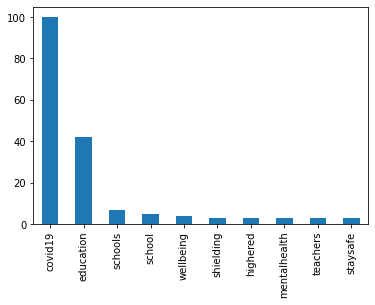

In [ ]:

hashtagsUK.plot(x ='Most common 10 hashtags', kind = 'bar')
plt.show()


Most common 10 hashtags for USA

Flattening the lists together and counting the values:

In [ ]:

hashtagss = pd.Series(dataset.explode("hashtags").hashtags).value_counts()

hashtagsUsa=hashtagss.head(n=10)

Same as above

In [ ]:
hashtagsUsa.to_frame()

,hashtags
covid19,100
education,69
teachers,68
crime,67
mayor,67
fire,67
sports,67
news,67
federal,67
technews,67


It contains the ten most used words in the UK in the plot shown below.

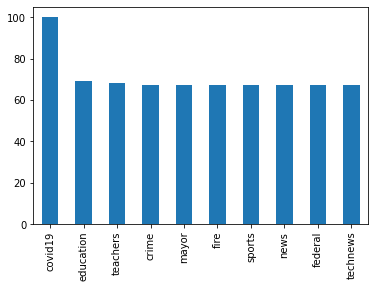

In [ ]:

hashtagsUsa.plot(x ='Most common 10 hashtags', kind = 'bar')
plt.show()

# Most common 10 words in Tweets

Most common 10 words in USA

Flattening the lists together and counting the values:



In the raw data, the text was full of links and hashtags. Above data was cleared and transferred to a new column, tokenized. The most repetitive words are counted and put into a list and converted into a data frame.

In [ ]:

terms = pd.Series(dataset.explode('text_processed').text_processed).value_counts()

commonword=terms.head(n=10)
commonword

covid        114
education    87 
teacher      71 
state        68 
politics     68 
retweet      68 
please       68 
news         67 
mayor        67 
federal      67 
Name: text_processed, dtype: int64

In [ ]:
commonword.to_frame()

,text_processed
covid,114
education,87
teacher,71
state,68
politics,68
retweet,68
please,68
news,67
mayor,67
federal,67


The ten most repetitive words in the cleared data are given in the plot below. Plot shows how many times it occurs in the data.

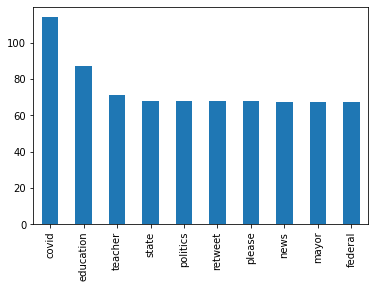

In [ ]:

commonword.plot(x ='Most common 10 Words', kind = 'bar')
plt.show()

Most common 10 words in UK

 Flattening the lists together and counting the values:

The ten most repetitive words in the cleared data are given in the plot below. Plot shows how many times it occurs in the data

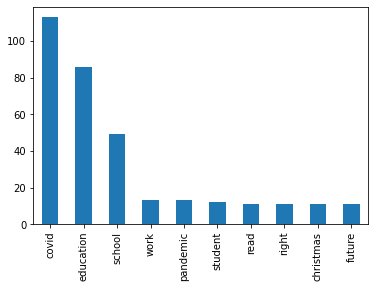

In [ ]:

termsuk = pd.Series(datasetUk.explode('text_processed').text_processed).value_counts()

worduk=termsuk.head(n=10)
worduk.to_frame()
worduk.plot(x ='Most common 10 hashtags', kind = 'bar')
plt.show()


When these two data are compared, covid, education are among the top ten most common words.

# Distribution of Source


In both data, it was seen from which source the users were tweeted. These resources are investigated below

Below are the tools that users in the UK tweet about.

In [ ]:
changesuk=pd.DataFrame(datasetUk, columns=["source"])
trialUk=changesuk.pivot_table(index=['source'], aggfunc='size')

print(trialUk)

source
CoSchedule             1 
IFTTT                  1 
Zapiercom              1 
buffer                 3 
dynamic signal         1 
hootsuite              7 
paperli                1 
sprinklr publishing    1 
sprout social          3 
tweetdeck              5 
twitter for android    13
twitter for ipad       3 
twitter for iphone     22
twitter web app        38
dtype: int64


# The Distribution of Text Length


Uncleaned data contained url and hashtags. The main text written by separating them above has been reached. The number of characters, which is an important factor for Twitter, was calculated in both data and added to the data.

To illustrate it, the minimum and the maximum values of lengthUk are 58 and 267 respectively. The mean of lengthUk is a lower value than the median.Moreover, the variability is calculated by using the interquartile range which is the difference between the 1st quartile and the 3rd quartile. It is equal to 81.25.

In [ ]:
datasetUk.text_length.describe()

count    100.000000
mean     194.910000
std      53.544298 
min      53.000000 
25%      159.750000
50%      210.000000
75%      239.250000
max      267.000000
Name: text_length, dtype: float64

According to the legth of text for USA data, the minimum and the maximum values of lengthUSA are 50 and 268 respectively. The mean of lengthUk is a lower value than the median.Moreover, the variability is calculated by using the interquartile range which is the difference between the 1st quartile and the 3rd quartile. It is equal to 37.25.


In [ ]:
dataset.text_length.describe()


count    100.00000
mean     179.79000
std      29.46674 
min      50.00000 
25%      164.00000
50%      178.50000
75%      196.50000
max      247.00000
Name: text_length, dtype: float64


Compared to UK data, we see that variability is less.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

C:\Users\begum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


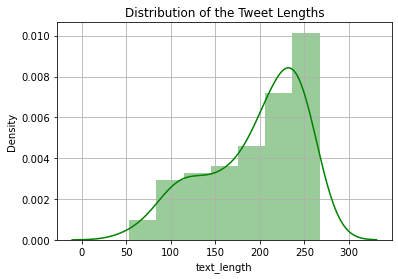

In [ ]:
#create distribution chart to visualize text dist
distlengthuk = sns.distplot(datasetUk['text_length'], color='green').set_title('Distribution of the Tweet Lengths');
plt.grid(True)

According to the Dİstribution of the Tweet Lenggths of the UK, it seems like bimodel. There are 2 peaks in the plot

C:\Users\begum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


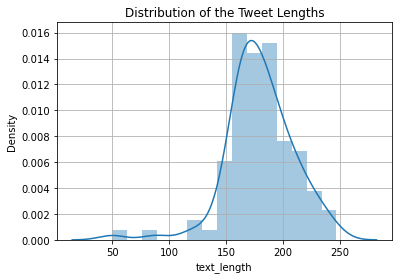

In [ ]:
#create distribution chart to visualize text dist
distlengthus = sns.distplot(dataset['text_length']).set_title('Distribution of the Tweet Lengths');
plt.grid(True)

The plot shows that the text length of USA data is right skewed.

# The Distribution of Retweet Count for UK& USA

According to the retweeet count for UK data, the minimum and the maximum values of retweet counts are 0 and 17 respectively.Moreover, the variability is calculated by using the interquartile range which is the difference between the 1st quartile and the 3rd quartile. It is equal to 1.

In [ ]:
datasetUk.retweet_count.describe()

count    100.000000
mean     1.200000  
std      2.502524  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      17.000000 
Name: retweet_count, dtype: float64

Distribution of the retweet count is

C:\Users\begum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


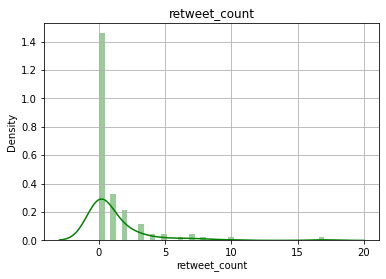

In [ ]:
distrtcountuk = sns.distplot(datasetUk['retweet_count'], color='green').set_title('retweet_count');
plt.grid(True)

To illustrate it, the minimum and the maximum values of retweet count are 0 and 7 respectively. The mean of favorite count is a higher value than the median.Moreover, the variability is calculated by using the interquartile range which is the difference between the 1st quartile and the 3rd quartile. It is equal to 7.When we compare it with UK data, we see that variability is higher. It is Right skewed.

In [ ]:
dataset.retweet_count.describe()

count    100.000000
mean     0.400000  
std      1.255292  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      7.000000  
Name: retweet_count, dtype: float64

To illustrate it, the minimum and the maximum values of retweet USA are 0 and 7 respectively. The mean of retweet count is a higher value than the median.

C:\Users\begum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


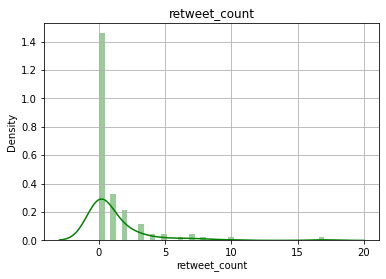

In [ ]:
distretcountuk = sns.distplot(datasetUk['retweet_count'], color='green').set_title('retweet_count');
plt.grid(True)

# The Distribution of Favorite Count for UK& USA

To illustrate it, the minimum and the maximum values of Favorite count are 0 and 20 respectively for the USA. The mean of favorite count is a higher value than the median.Moreover, the variability is calculated by using the interquartile range which is the difference between the 1st quartile and the 3rd quartile. It is equal to 1.

The minimum and maximum values of favorite counts are 0 and 25 for the Uk data. And the variability is 2.25 It can be said that variability of UK data is higher than USA data.

In [ ]:
dataset.favorite_count.describe()

count    100.000000
mean     1.260000  
std      3.252412  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      20.000000 
Name: favorite_count, dtype: float64

In [ ]:
datasetUk.favorite_count.describe()


count    100.000000
mean     2.660000  
std      4.406652  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      3.000000  
max      25.000000 
Name: favorite_count, dtype: float64

The distribution of Favorite count of UK and Usa both of them are right skewed

C:\Users\begum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


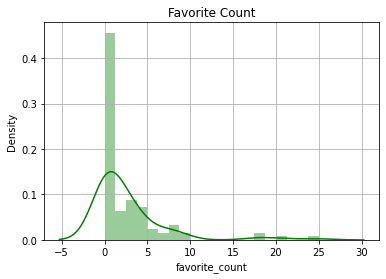

In [ ]:
distfavcountuk = sns.distplot(datasetUk['favorite_count'], color='green').set_title('Favorite Count');
plt.grid(True)

C:\Users\begum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


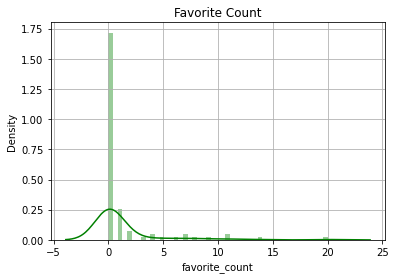

In [ ]:
distfavcount = sns.distplot(dataset['favorite_count'], color='green').set_title('Favorite Count');
plt.grid(True)

The plot of Text Length, Type of Sentiment and Country

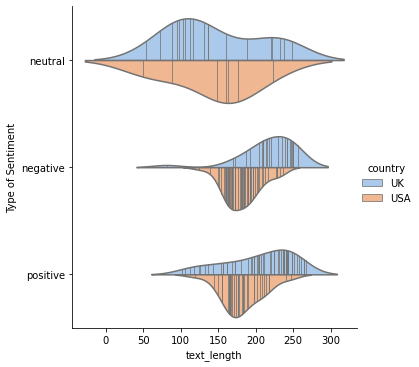

In [ ]:
sns.catplot(x="text_length", y="Type of Sentiment", hue="country",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=datasetwhole)

In UK, both negative and positive tweets have similar distribution ,which is left skewed,in terms of shape. However, neutral has bimodal distribution. Similar concluison can be drawn in US. Both positive and negative tweets have approximately symmetric distribution while neutral ones have left skewed distribution. If we compare them by countries, all of three categories show different patterns based on country.

TYPE OF SENTIMENT


Looking at the chart, 57 tweets from the UK were positive, 28 were neutral and 15 were negative.

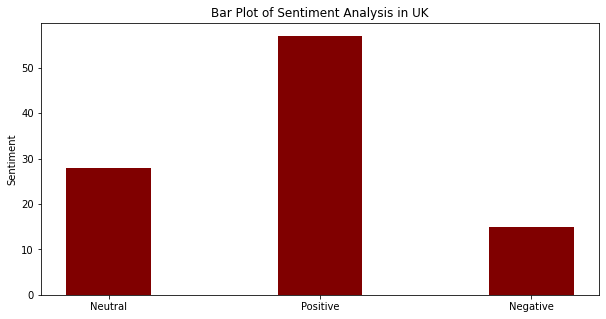

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Neutral':28, 'Positive':57, 'Negative':15,
        }
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

plt.xlabel("")
plt.ylabel("Sentiment")
plt.title("Bar Plot of Sentiment Analysis in UK")
plt.show()

Looking at the chart, 36 tweets from the USA were positive, 9 were neutral and 55 were negative.

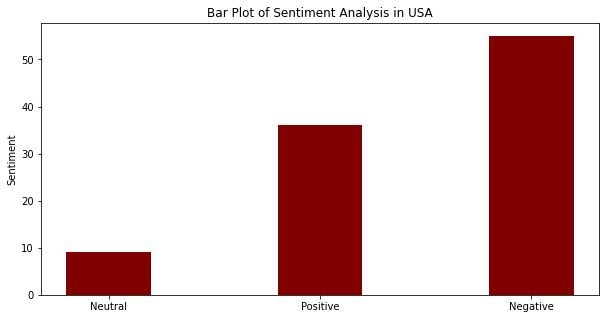

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Neutral':9, 'Positive':36, 'Negative':55,
        }
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

plt.xlabel("")
plt.ylabel("Sentiment")
plt.title("Bar Plot of Sentiment Analysis in USA")
plt.show()

In this part of analysis, the UK data and USA data is nerged.

In [ ]:
country = np.repeat("USA",100)
dataset["country"] = country

display(dataset)

,screen_name,text,hashtags,favorite_count,retweet_count,source,clean_text,text_processed,text_bigrams,sentiment,Type of Sentiment,text_length,country
0,WorldBank,Discover how #Rwanda is using digitalization to address the education challenges brought on by #COVID19 #ResilientRecovery: https://t.co/55rgCStz8V https://t.co/iPbHobpGaM,"[rwanda, covid19, resilientrecovery]",14,5,Hootsuite Inc,discover how rwanda is using digitalization to address the education challenges brought on by covid19 resilientrecovery,"[discover, rwanda, use, digitalization, address, education, challenge, bring, covid, resilientrecovery]","[[use, digitalization], [education, challenge], [challenge, bring]]",0.0772,positive,119,USA
1,BrookingsGov,"Amid the #COVID19 pandemic and a White House transition, what's next for American schools? Join us Tuesday for an expert discussion of the future of US education, including pandemic recovery, school choice, and more. Register: https://t.co/c2mFMKB8FT",[covid19],0,0,Sprout Social,amid the covid19 pandemic and a white house transition what's next for american schools join us tuesday for an expert discussion of the future of us education including pandemic recovery school choice and more register,"[amid, covid, pandemic, white, house, transition, what's, next, american, school, join, u, tuesday, expert, discussion, future, u, education, include, pandemic, recovery, school, choice, register]","[[white, house], [house, transition], [transition, what's], [what's, next], [american, school], [school, join], [join, u], [u, tuesday], [expert, discussion], [u, education], [education, include], [include, pandemic], [pandemic, recovery], [recovery, school], [school, choice]]",0.2960,positive,218,USA
2,AJBlackston,eLearning's Time To Shine? Apparently Not https://t.co/IphPqnejEz #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #Security #Mayor #Teachers #TechNews #Sports Please Retweet,"[state, crime, education, technews, teachers, security, sports, federal, local, covid19, mayor, politics, fire, news]",0,0,Microsoft Power Platform,elearning's time to shine apparently not education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,"[elearning's, time, shine, apparently, education, federal, state, local, news, crime, fire, politics, covid, security, mayor, teacher, technews, sport, please, retweet]","[[elearning's, time], [shine, apparently], [education, federal], [federal, state], [state, local], [local, news], [news, crime], [crime, fire], [fire, politics], [politics, covid], [security, mayor], [mayor, teacher], [teacher, technews], [technews, sport], [sport, please], [please, retweet]]",-0.2960,negative,158,USA
3,AJBlackston,Navajo Nation Readies For Vaccine To Fight 'Invisible Monster' https://t.co/bdiibgEV88 #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #Security #Mayor #Teachers #TechNews #Sports Please Retweet,"[state, crime, education, technews, teachers, security, sports, federal, local, covid19, mayor, politics, fire, news]",0,0,Microsoft Power Platform,navajo nation readies for vaccine to fight 'invisible monster' education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,"[navajo, nation, ready, vaccine, fight, invisible, monster, education, federal, state, local, news, crime, fire, politics, covid, security, mayor, teacher, technews, sport, please, retweet]","[[navajo, nation], [nation, ready], [invisible, monster], [education, federal], [federal, state], [state, local], [local, news], [news, crime], [crime, fire], [fire, politics], [politics, covid], [security, mayor], [mayor, teacher], [teacher, technews], [technews, sport], [sport, please], [please, retweet]]",-0.5859,negative,180,USA
4,AJBlackston,8 Ways eLearning Can Help Us Prepare For A New World Of Work https://t.co/opcKTjiyZr #Education #Federal #State #Local #News #Crime #Fire #Politics #COVI

In [ ]:
country = np.repeat("UK",100)
datasetUk["country"] = country

display(dataset)

,screen_name,text,hashtags,favorite_count,retweet_count,source,clean_text,text_processed,text_bigrams,sentiment,Type of Sentiment,text_length,country
0,WorldBank,Discover how #Rwanda is using digitalization to address the education challenges brought on by #COVID19 #ResilientRecovery: https://t.co/55rgCStz8V https://t.co/iPbHobpGaM,"[rwanda, covid19, resilientrecovery]",14,5,Hootsuite Inc,discover how rwanda is using digitalization to address the education challenges brought on by covid19 resilientrecovery,"[discover, rwanda, use, digitalization, address, education, challenge, bring, covid, resilientrecovery]","[[use, digitalization], [education, challenge], [challenge, bring]]",0.0772,positive,119,USA
1,BrookingsGov,"Amid the #COVID19 pandemic and a White House transition, what's next for American schools? Join us Tuesday for an expert discussion of the future of US education, including pandemic recovery, school choice, and more. Register: https://t.co/c2mFMKB8FT",[covid19],0,0,Sprout Social,amid the covid19 pandemic and a white house transition what's next for american schools join us tuesday for an expert discussion of the future of us education including pandemic recovery school choice and more register,"[amid, covid, pandemic, white, house, transition, what's, next, american, school, join, u, tuesday, expert, discussion, future, u, education, include, pandemic, recovery, school, choice, register]","[[white, house], [house, transition], [transition, what's], [what's, next], [american, school], [school, join], [join, u], [u, tuesday], [expert, discussion], [u, education], [education, include], [include, pandemic], [pandemic, recovery], [recovery, school], [school, choice]]",0.2960,positive,218,USA
2,AJBlackston,eLearning's Time To Shine? Apparently Not https://t.co/IphPqnejEz #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #Security #Mayor #Teachers #TechNews #Sports Please Retweet,"[state, crime, education, technews, teachers, security, sports, federal, local, covid19, mayor, politics, fire, news]",0,0,Microsoft Power Platform,elearning's time to shine apparently not education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,"[elearning's, time, shine, apparently, education, federal, state, local, news, crime, fire, politics, covid, security, mayor, teacher, technews, sport, please, retweet]","[[elearning's, time], [shine, apparently], [education, federal], [federal, state], [state, local], [local, news], [news, crime], [crime, fire], [fire, politics], [politics, covid], [security, mayor], [mayor, teacher], [teacher, technews], [technews, sport], [sport, please], [please, retweet]]",-0.2960,negative,158,USA
3,AJBlackston,Navajo Nation Readies For Vaccine To Fight 'Invisible Monster' https://t.co/bdiibgEV88 #Education #Federal #State #Local #News #Crime #Fire #Politics #COVID19 #Security #Mayor #Teachers #TechNews #Sports Please Retweet,"[state, crime, education, technews, teachers, security, sports, federal, local, covid19, mayor, politics, fire, news]",0,0,Microsoft Power Platform,navajo nation readies for vaccine to fight 'invisible monster' education federal state local news crime fire politics covid19 security mayor teachers technews sports please retweet,"[navajo, nation, ready, vaccine, fight, invisible, monster, education, federal, state, local, news, crime, fire, politics, covid, security, mayor, teacher, technews, sport, please, retweet]","[[navajo, nation], [nation, ready], [invisible, monster], [education, federal], [federal, state], [state, local], [local, news], [news, crime], [crime, fire], [fire, politics], [politics, covid], [security, mayor], [mayor, teacher], [teacher, technews], [technews, sport], [sport, please], [please, retweet]]",-0.5859,negative,180,USA
4,AJBlackston,8 Ways eLearning Can Help Us Prepare For A New World Of Work https://t.co/opcKTjiyZr #Education #Federal #State #Local #News #Crime #Fire #Politics #COVI

In [ ]:
frames = [datasetUk , dataset]

datasetwhole = pd.concat(frames)

display(datasetwhole)

,screen_name,text,hashtags,favorite_count,retweet_count,source,clean_text,text_processed,text_bigrams,sentiment,Type of Sentiment,text_length,country
0,Parikiaki,"A total of 1,921 students absent from school on December 11 due to COVID-19, Cyprus Education Ministry says https://t.co/Tl9SA8j9AI #Cypriotstudents #Cyprus #coronavirus #covid19 #Cypruscoronavirus #covid19tests #Cyprusairports #Cypruslockdownmeasures #covid19vaccineCyprus https://t.co/5nmBjDHCjw","[coronavirus, cyprus, cypruscoronavirus, covid19, cypriotstudents, cypruslockdownmeasures, covid19tests, covid19vaccinecyprus, cyprusairports]",0,0,twitter for android,a total of 1921 students absent from school on december 11 due to covid-19 cyprus education ministry says cypriotstudents cyprus coronavirus covid19 cypruscoronavirus covid19tests cyprusairports cypruslockdownmeasures covid19vaccinecyprus,"[total, student, absent, school, december, due, covid, cyprus, education, ministry, say, cypriotstudents, cyprus, coronavirus, covid, cypruscoronavirus, covid, 19tests, cyprusairports, cypruslockdownmeasures, covid, 19vaccinecyprus]","[[student, absent], [cyprus, education], [education, ministry], [ministry, say], [say, cypriotstudents], [cypriotstudents, cyprus], [cyprus, coronavirus], [coronavirus, covid], [cypruscoronavirus, covid], [covid, 19tests], [19tests, cyprusairports], [cyprusairports, cypruslockdownmeasures], [cypruslockdownmeasures, covid], [covid, 19vaccinecyprus]]",0.0000,neutral,238,UK
1,darkavenger12a,Royal Borough of Greenwich schools to close from Monday as Covid-19 cases rise | #tier3 #london #CovidChristmas #covid19 @gmb @bbc5live https://t.co/JPci8kMzHK,"[tier3, covid19, covidchristmas, london]",0,0,twitter for ipad,royal borough of greenwich schools to close from monday as covid-19 cases rise | tier3 london covidchristmas covid19,"[royal, borough, greenwich, school, close, monday, covid, case, rise, tier, london, covidchristmas, covid]","[[royal, borough], [greenwich, school], [case, rise], [london, covidchristmas], [covidchristmas, covid]]",0.0000,neutral,116,UK
2,WestYorksOPCC,"News: Education inclusion focus of groundbreaking study to tackle violent crime The @wy_vru has partnered with @CrestAdvisory to explore patterns, trends and contributory factors, with a special attention paid to the #COVID19 period Read more: https://t.co/Q7nigoITXr https://t.co/eokfGz5U2l",[covid19],1,0,tweetdeck,news education inclusion focus of groundbreaking study to tackle violent crime the has partnered with to explore patterns trends and contributory factors with a special attention paid to the covid19 period read more,"[news, education, inclusion, focus, groundbreaking, study, tackle, violent, crime, partner, explore, pattern, trend, contributory, factor, special, attention, pay, covid, period, read]","[[news, education], [education, inclusion], [inclusion, focus], [groundbreaking, study], [tackle, violent], [violent, crime], [explore, pattern], [pattern, trend], [contributory, factor], [special, attention], [attention, pay], [period, read]]",-0.6908,negative,215,UK
3,Poeticjazztice,"Her words resonate with me because of the #COVID19 related study of heart-based, unwritten New Covenant centered, ""battle of the sexes"" based education that I'm pursuing here: https://t.co/Yy026IQtgJ . (2",[covid19],0,0,twitter web app,"her words resonate with me because of the covid19 related study of heart-based unwritten new covenant centered ""battle of the sexes"" based education that i'm pursuing here 2","[word, resonate, covid, related, study, heart-based, unwritten, new, covenant, center, battle, sex, base, education, i'm, pursue]","[[word, resonate], [related, study], [heart-based, unwritten], [unwritten, new], [new, covenant], [covenant, center], [base, education], [i'm, pursue]]",-0.3818,negative,173,UK
4,playinwild,@EcoUrbanRanger @TheGreenParty @natalieben @BBCPM @NaturePremium1 There's been so much reflection in the world of business & industry post #COVID19 but there ap

# Hypothesis Test


1-)

Mutiple Logistic Regression is applied to the effect of covariates on a binary response. It uses the logit function and model the odds of success.

The model of multiple logistic regression is;

logit(p/(1-p)) =ß0 +ß1*x1+..+ßn*xn


Multiple logistic regression is implemented to see the effect of retweet count and text length on the country

In [ ]:
import pandas as pd
import statsmodels.api as sm

datasetwhole = pd.get_dummies(datasetwhole, columns=["country"], drop_first = True)
datasetwhole["intercept"]=1.0 # intercept is as 1

In [ ]:


#split dataset in features and target variable
feature_cols = ['retweet_count', 'text_length', "intercept"] #covariates of model
xs = datasetwhole[feature_cols] # Features
y = datasetwhole["country_USA"] # response variable is dummy


In [ ]:

logit_model=sm.Logit(datasetwhole["country_USA"], xs.astype(float)) #multiple logistic regression model, type of covariates of is set as float
result = logit_model.fit()
print(result.summary()) #model summary

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            country_USA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:                     inf
Time:                        02:22:46   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
retweet_count    -0.3007      0.114     -2.641      0.008      -0.524      -0.077
text_length      -0.0086 

C:\Users\begum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\begum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\begum\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\begum\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


The model above is conducted to see the effect of sentiment and retweet count on country. It can be seen that the model is not significant by looking at the p value of the model which is 1 which is very high from the signifcance level 0.05 and results in not rejecting the null hypothesis which the coefficients are equal to each other and zero. Moreover, looking at the significance of the variables, none of the is significant since their confidence intervals including zero, that means with 95% the coeeficients may lie between these intervals and also may take the value 0. Therefore covariates of the model are also not significant to be added to the model. Even though the variables are not significant the odds ratios of them can be explained as, one unit change in sentiment results in decreasing the odds of country by 0.317 units. Similarly, one unit change in retweet counts results in 0.0037 units decrease in the odds of country.

2-)
H0: The text length is equal between the two groups

HA: The text length is not equal between the two groups

It is compared to mean of text length for the UK and  USA. It is applied to t-test for the hypothesis test. The assumption is that the continous data comes from normality. In order to check assumption, the shapiro-wilk test is used. However, the result of shapiro wilk's p value is smaller than 0.05. That means, text length is not normal because of this reason I apply that wilcoxon test.

In [ ]:
stats.shapiro(dataset['text_length'])
stats.shapiro(datasetUk['text_length'])

ShapiroResult(statistic=0.9111338257789612, pvalue=4.909830749966204e-06)

In [ ]:
from scipy import stats
from scipy.stats import wilcoxon

In [ ]:
rv1 = datasetUk['text_length']
rv2 = dataset['text_length']

In [ ]:
stats.mannwhitneyu(rv1, rv2, alternative='two-sided')


MannwhitneyuResult(statistic=6455.5, pvalue=0.00037744825907499996)

The result of the Mann-Whitney U Test is in above. The following null and alternative hypotheses:

H0: The text length is equal between the two groups

HA: The text length is not equal between the two groups

Since the p-value 0.002528 is not less than 0.05, it can be said that there is no sufficient evidence to say the text length different between the UK and USA